# Mexico Toy Sales

Sales & inventory data for a  chain of toy stores in Mexico called Maven Toys, including information about products, stores, daily transactions, and current inventory levels at each location.

Multiple Table	Field	Description -

* Products	Product_ID	Product ID
* Products	Product_Name	Product name
* Products	Product_Category	Product Category
*	Products	Product_Cost	Product cost ($USD)
*	Products	Product_Price	Product retail price ($USD)
*	Inventory	Store_ID	Store ID
*	Inventory	Product_ID	Product ID
*	Inventory	Stock_On_Hand	Stock quantity of the product in the store (in...
*	Stores	Store_ID	Store ID
*	Stores	Store_Name	Store name
*	Stores	Store_City	City in Mexico where the store is located
*	Stores	Store_Location	Location in the city where the store is located
* Stores	Store_Open_Date	Date when the store was opened
*	Sales	Sale_ID	Sale ID
*	Sales	Date	Date of the transaction
*	Sales	Store_ID	Store ID
*	Sales	Product_ID	Product ID
*	Sales	Units	Units sold
*	Calendar	Date	Calendar date


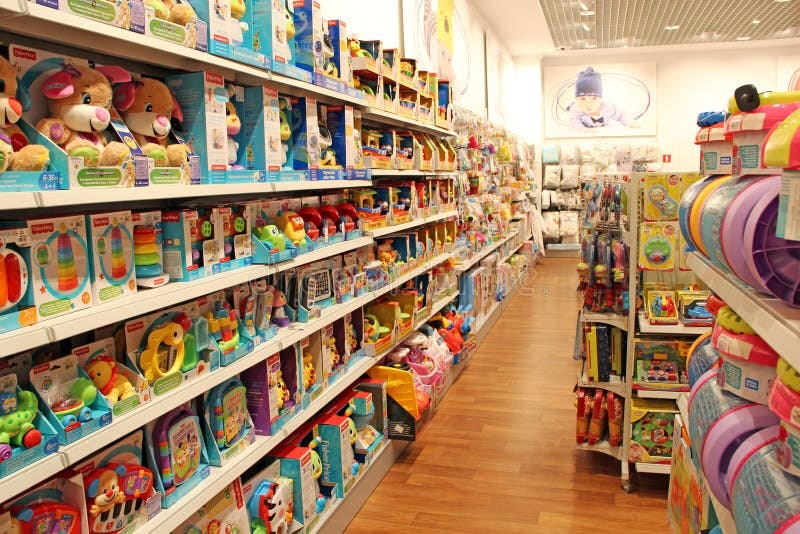


# Notebook Structure

* Import necessary libraries
* Import all the necessary datasets
* Visualizing the dataset
* Merging the dataset
* Dataset summarization
* Important Pre-computation/Cleaning
* Exploratory Data Analysis - Univariate Analysis of Numerical Variables
* Exploratory Data Analysis - Univariate Analysis of Categorical Variables
* Exploratory Data Analysis - Univariate Analysis of Temporal variables
* Bivariate analysis - Numerical Vs Numerical variable
* Bivariate analysis - Numerical Vs Categorical variable
* Bivariate analysis - Categorical Vs Categorical variable

# 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 2. Import all the necessary datasets

In [2]:
calendar = pd.read_csv('calendar.csv')
dictionary = pd.read_csv('data_dictionary.csv')
inventory = pd.read_csv('inventory.csv')
products = pd.read_csv('products.csv')
sales = pd.read_csv('sales.csv')
stores = pd.read_csv('stores.csv')

# 3. Visualizing the dataset

In [3]:
dictionary

Table             Field  \
0    Products        Product_ID   
1    Products      Product_Name   
2    Products  Product_Category   
3    Products      Product_Cost   
4    Products     Product_Price   
5   Inventory          Store_ID   
6   Inventory        Product_ID   
7   Inventory     Stock_On_Hand   
8      Stores          Store_ID   
9      Stores        Store_Name   
10     Stores        Store_City   
11     Stores    Store_Location   
12     Stores   Store_Open_Date   
13      Sales           Sale_ID   
14      Sales              Date   
15      Sales          Store_ID   
16      Sales        Product_ID   
17      Sales             Units   
18   Calendar              Date   

                                          Description  
0                                          Product ID  
1                                        Product name  
2                                    Product Category  
3                                 Product cost ($USD)  
4                         Product retail price ($USD)  
5                                            Store ID  
6                                          Product ID  
7   Stock quantity of the product in the store (in...  
8                                            Store ID  
9                                          Store name  
10          City in Mexico where the store is located  
11    Location in the city where the store is located  
12                     Date when the store was opened  
13                                            Sale ID  
14                            Date of the transaction  
15                                           Store ID  
16                                         Product ID  
17                                         Units sold  
18                                      Calendar date

In [4]:
sales.head()

Sale_ID        Date  Store_ID  Product_ID  Units
0        1  2022-01-01      24.0         4.0    1.0
1        2  2022-01-01      28.0         1.0    1.0
2        3  2022-01-01       6.0         8.0    1.0
3        4  2022-01-01      48.0         7.0    1.0
4        5  2022-01-01      44.0        18.0    1.0

In [5]:
products.head()

Product_ID      Product_Name Product_Category Product_Cost Product_Price
0           1     Action Figure             Toys       $9.99        $15.99 
1           2    Animal Figures             Toys       $9.99        $12.99 
2           3   Barrel O' Slime     Art & Crafts       $1.99         $3.99 
3           4  Chutes & Ladders            Games       $9.99        $12.99 
4           5  Classic Dominoes            Games       $7.99         $9.99

In [6]:
stores.head()

Store_ID                Store_Name   Store_City Store_Location  \
0         1  Maven Toys Guadalajara 1  Guadalajara    Residential   
1         2    Maven Toys Monterrey 1    Monterrey    Residential   
2         3  Maven Toys Guadalajara 2  Guadalajara     Commercial   
3         4     Maven Toys Saltillo 1     Saltillo       Downtown   
4         5       Maven Toys La Paz 1       La Paz       Downtown   

  Store_Open_Date  
0      1992-09-18  
1      1995-04-27  
2      1999-12-27  
3      2000-01-01  
4      2001-05-31

In [7]:
inventory.head()

Store_ID  Product_ID  Stock_On_Hand
0         1           1             27
1         1           2              0
2         1           3             32
3         1           4              6
4         1           5              0

# 4. Merging the dataset

* Merging sales and products on 'Product_ID'
* Merging sales_products with stores on 'store_ID'
* Merging sales_products_stores with inventory on the composite key ['Product_ID' , 'Store_ID']
* Storing it in a new dataframe

### A. Merging sales and products on 'Product_ID'

In [8]:
sales_products = pd.merge(sales , products , how = 'inner' , on = 'Product_ID')

In [9]:
sales_products.head()

Sale_ID        Date  Store_ID  Product_ID  Units      Product_Name  \
0        1  2022-01-01      24.0         4.0    1.0  Chutes & Ladders   
1        2  2022-01-01      28.0         1.0    1.0     Action Figure   
2        3  2022-01-01       6.0         8.0    1.0     Deck Of Cards   
3        4  2022-01-01      48.0         7.0    1.0          Dart Gun   
4        5  2022-01-01      44.0        18.0    1.0       Lego Bricks   

    Product_Category Product_Cost Product_Price  
0              Games       $9.99        $12.99   
1               Toys       $9.99        $15.99   
2              Games       $3.99         $6.99   
3  Sports & Outdoors      $11.99        $15.99   
4               Toys      $34.99        $39.99

### B. Merging sales_products with stores on 'store_ID'

In [10]:
sales_products_stores = pd.merge(sales_products , stores , how = 'inner' , on = 'Store_ID')

In [11]:
sales_products_stores.head()

Sale_ID        Date  Store_ID  Product_ID  Units      Product_Name  \
0        1  2022-01-01      24.0         4.0    1.0  Chutes & Ladders   
1        2  2022-01-01      28.0         1.0    1.0     Action Figure   
2        3  2022-01-01       6.0         8.0    1.0     Deck Of Cards   
3        4  2022-01-01      48.0         7.0    1.0          Dart Gun   
4        5  2022-01-01      44.0        18.0    1.0       Lego Bricks   

    Product_Category Product_Cost Product_Price                   Store_Name  \
0              Games       $9.99        $12.99   Maven Toys Aguascalientes 1   
1               Toys       $9.99        $15.99           Maven Toys Puebla 2   
2              Games       $3.99         $6.99         Maven Toys Mexicali 1   
3  Sports & Outdoors      $11.99        $15.99         Maven Toys Saltillo 2   
4               Toys      $34.99        $39.99           Maven Toys Puebla 3   

       Store_City Store_Location Store_Open_Date  
0  Aguascalientes       Downtown      2010-07-31  
1          Puebla       Downtown      2011-04-01  
2        Mexicali     Commercial      2003-12-13  
3        Saltillo     Commercial      2016-03-23  
4          Puebla    Residential      2014-12-27

### C. Merging sales_products_stores with inventory on the composite key ['Product_ID' , 'Store_ID']

In [12]:
sales_products_stores_inventory = pd.merge(sales_products_stores , inventory , how = 'inner' , on = ['Product_ID' , 'Store_ID'])

In [13]:
sales_products_stores_inventory.head()

Sale_ID        Date  Store_ID  Product_ID  Units      Product_Name  \
0        1  2022-01-01      24.0         4.0    1.0  Chutes & Ladders   
1        2  2022-01-01      28.0         1.0    1.0     Action Figure   
2        3  2022-01-01       6.0         8.0    1.0     Deck Of Cards   
3        4  2022-01-01      48.0         7.0    1.0          Dart Gun   
4        5  2022-01-01      44.0        18.0    1.0       Lego Bricks   

    Product_Category Product_Cost Product_Price                   Store_Name  \
0              Games       $9.99        $12.99   Maven Toys Aguascalientes 1   
1               Toys       $9.99        $15.99           Maven Toys Puebla 2   
2              Games       $3.99         $6.99         Maven Toys Mexicali 1   
3  Sports & Outdoors      $11.99        $15.99         Maven Toys Saltillo 2   
4               Toys      $34.99        $39.99           Maven Toys Puebla 3   

       Store_City Store_Location Store_Open_Date  Stock_On_Hand  
0  Aguascalientes       Downtown      2010-07-31              1  
1          Puebla       Downtown      2011-04-01              6  
2        Mexicali     Commercial      2003-12-13             50  
3        Saltillo     Commercial      2016-03-23             28  
4          Puebla    Residential      2014-12-27            117

### D. Storing it in a new dataframe

In [14]:
df = sales_products_stores_inventory

In [15]:
df.head()

Sale_ID        Date  Store_ID  Product_ID  Units      Product_Name  \
0        1  2022-01-01      24.0         4.0    1.0  Chutes & Ladders   
1        2  2022-01-01      28.0         1.0    1.0     Action Figure   
2        3  2022-01-01       6.0         8.0    1.0     Deck Of Cards   
3        4  2022-01-01      48.0         7.0    1.0          Dart Gun   
4        5  2022-01-01      44.0        18.0    1.0       Lego Bricks   

    Product_Category Product_Cost Product_Price                   Store_Name  \
0              Games       $9.99        $12.99   Maven Toys Aguascalientes 1   
1               Toys       $9.99        $15.99           Maven Toys Puebla 2   
2              Games       $3.99         $6.99         Maven Toys Mexicali 1   
3  Sports & Outdoors      $11.99        $15.99         Maven Toys Saltillo 2   
4               Toys      $34.99        $39.99           Maven Toys Puebla 3   

       Store_City Store_Location Store_Open_Date  Stock_On_Hand  
0  Aguascalientes       Downtown      2010-07-31              1  
1          Puebla       Downtown      2011-04-01              6  
2        Mexicali     Commercial      2003-12-13             50  
3        Saltillo     Commercial      2016-03-23             28  
4          Puebla    Residential      2014-12-27            117

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713347 entries, 0 to 713346
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sale_ID           713347 non-null  int64  
 1   Date              713347 non-null  object 
 2   Store_ID          713347 non-null  float64
 3   Product_ID        713347 non-null  float64
 4   Units             713347 non-null  float64
 5   Product_Name      713347 non-null  object 
 6   Product_Category  713347 non-null  object 
 7   Product_Cost      713347 non-null  object 
 8   Product_Price     713347 non-null  object 
 9   Store_Name        713347 non-null  object 
 10  Store_City        713347 non-null  object 
 11  Store_Location    713347 non-null  object 
 12  Store_Open_Date   713347 non-null  object 
 13  Stock_On_Hand     713347 non-null  int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 76.2+ MB


# 5. Dataset summarization

In [17]:
# Numerical (int64): Sale_ID, Store_ID, Product_ID, Units, Stock_On_Hand
# Categorical/Object : Date, Product_Name, Product_Category, Product_Cost, Product_Price, Store_Name, Store_City, Store_Location, Store_Open_Date

# 6. Important Pre-computation/Cleaning

* conversion of Date and Store_Open_Date to datetime
* Product_Cost and Product_Price must be converted to numerical (float/int) after handling any non-numeric characters.
* Derive new metrics

### A. conversion of Date and Store_Open_Date to datetime

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713347 entries, 0 to 713346
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sale_ID           713347 non-null  int64  
 1   Date              713347 non-null  object 
 2   Store_ID          713347 non-null  float64
 3   Product_ID        713347 non-null  float64
 4   Units             713347 non-null  float64
 5   Product_Name      713347 non-null  object 
 6   Product_Category  713347 non-null  object 
 7   Product_Cost      713347 non-null  object 
 8   Product_Price     713347 non-null  object 
 9   Store_Name        713347 non-null  object 
 10  Store_City        713347 non-null  object 
 11  Store_Location    713347 non-null  object 
 12  Store_Open_Date   713347 non-null  object 
 13  Stock_On_Hand     713347 non-null  int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 76.2+ MB


In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df['Store_Open_Date'] = pd.to_datetime(df['Store_Open_Date'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713347 entries, 0 to 713346
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sale_ID           713347 non-null  int64         
 1   Date              713347 non-null  datetime64[ns]
 2   Store_ID          713347 non-null  float64       
 3   Product_ID        713347 non-null  float64       
 4   Units             713347 non-null  float64       
 5   Product_Name      713347 non-null  object        
 6   Product_Category  713347 non-null  object        
 7   Product_Cost      713347 non-null  object        
 8   Product_Price     713347 non-null  object        
 9   Store_Name        713347 non-null  object        
 10  Store_City        713347 non-null  object        
 11  Store_Location    713347 non-null  object        
 12  Store_Open_Date   713347 non-null  datetime64[ns]
 13  Stock_On_Hand     713347 non-null  int64         
dtypes: d

### B. Product_Cost and Product_Price must be converted to numerical (float/int) after handling any non-numeric characters.

In [21]:
df['Product_Cost'] = df['Product_Cost'].str.replace('$' , '')
df['Product_Price'] = df['Product_Price'].str.replace('$' , '')

In [22]:
print(df['Product_Cost'].head())
print(df['Product_Price'].head())

0     9.99 
1     9.99 
2     3.99 
3    11.99 
4    34.99 
Name: Product_Cost, dtype: object
0    12.99 
1    15.99 
2     6.99 
3    15.99 
4    39.99 
Name: Product_Price, dtype: object


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713347 entries, 0 to 713346
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sale_ID           713347 non-null  int64         
 1   Date              713347 non-null  datetime64[ns]
 2   Store_ID          713347 non-null  float64       
 3   Product_ID        713347 non-null  float64       
 4   Units             713347 non-null  float64       
 5   Product_Name      713347 non-null  object        
 6   Product_Category  713347 non-null  object        
 7   Product_Cost      713347 non-null  object        
 8   Product_Price     713347 non-null  object        
 9   Store_Name        713347 non-null  object        
 10  Store_City        713347 non-null  object        
 11  Store_Location    713347 non-null  object        
 12  Store_Open_Date   713347 non-null  datetime64[ns]
 13  Stock_On_Hand     713347 non-null  int64         
dtypes: d

In [24]:
df['Product_Cost'] = df['Product_Cost'].astype('float64')
df['Product_Price'] = df['Product_Price'].astype('float64')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713347 entries, 0 to 713346
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sale_ID           713347 non-null  int64         
 1   Date              713347 non-null  datetime64[ns]
 2   Store_ID          713347 non-null  float64       
 3   Product_ID        713347 non-null  float64       
 4   Units             713347 non-null  float64       
 5   Product_Name      713347 non-null  object        
 6   Product_Category  713347 non-null  object        
 7   Product_Cost      713347 non-null  float64       
 8   Product_Price     713347 non-null  float64       
 9   Store_Name        713347 non-null  object        
 10  Store_City        713347 non-null  object        
 11  Store_Location    713347 non-null  object        
 12  Store_Open_Date   713347 non-null  datetime64[ns]
 13  Stock_On_Hand     713347 non-null  int64         
dtypes: d

### C. Derive new metrics

* Revenue (Units * Product_Price)
* Profit (Units * (Product_Price - Product_Cost))

In [26]:
df['Revenue'] = df['Units'] * df['Product_Price']
df['Profit'] = df['Units'] * (df['Product_Price'] - df['Product_Cost'])

In [27]:
df.head()

Sale_ID       Date  Store_ID  Product_ID  Units      Product_Name  \
0        1 2022-01-01      24.0         4.0    1.0  Chutes & Ladders   
1        2 2022-01-01      28.0         1.0    1.0     Action Figure   
2        3 2022-01-01       6.0         8.0    1.0     Deck Of Cards   
3        4 2022-01-01      48.0         7.0    1.0          Dart Gun   
4        5 2022-01-01      44.0        18.0    1.0       Lego Bricks   

    Product_Category  Product_Cost  Product_Price  \
0              Games          9.99          12.99   
1               Toys          9.99          15.99   
2              Games          3.99           6.99   
3  Sports & Outdoors         11.99          15.99   
4               Toys         34.99          39.99   

                    Store_Name      Store_City Store_Location Store_Open_Date  \
0  Maven Toys Aguascalientes 1  Aguascalientes       Downtown      2010-07-31   
1          Maven Toys Puebla 2          Puebla       Downtown      2011-04-01   
2        Maven Toys Mexicali 1        Mexicali     Commercial      2003-12-13   
3        Maven Toys Saltillo 2        Saltillo     Commercial      2016-03-23   
4          Maven Toys Puebla 3          Puebla    Residential      2014-12-27   

   Stock_On_Hand  Revenue  Profit  
0              1    12.99     3.0  
1              6    15.99     6.0  
2             50     6.99     3.0  
3             28    15.99     4.0  
4            117    39.99     5.0

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713347 entries, 0 to 713346
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Sale_ID           713347 non-null  int64         
 1   Date              713347 non-null  datetime64[ns]
 2   Store_ID          713347 non-null  float64       
 3   Product_ID        713347 non-null  float64       
 4   Units             713347 non-null  float64       
 5   Product_Name      713347 non-null  object        
 6   Product_Category  713347 non-null  object        
 7   Product_Cost      713347 non-null  float64       
 8   Product_Price     713347 non-null  float64       
 9   Store_Name        713347 non-null  object        
 10  Store_City        713347 non-null  object        
 11  Store_Location    713347 non-null  object        
 12  Store_Open_Date   713347 non-null  datetime64[ns]
 13  Stock_On_Hand     713347 non-null  int64         
 14  Reve

# 7. Exploratory Data Analysis - Univariate Analysis of Numerical Variables

In [29]:
# Numerical Variables to be analyzed : Units, Stock_On_Hand, Product_Cost, Product_Price, derived Revenue, Profit

### A. Quantitative Analysis

* What is the central tendency (mean, median, mode) of Units sold per transaction?
* What is the typical Stock_On_Hand? What are the minimum and maximum stock levels?
* What is the distribution of Product_Cost and Product_Price? Are there significant outliers?
* What are the total and average Revenue and Profit per transaction?
* What is the skewness and kurtosis of Units, Revenue, and Profit?

In [30]:

# 1. Central tendency (mean, median, mode) of Units sold per transaction
print("\n1. Central Tendency of 'Units' sold per transaction:")
print(f"   Mean Units: {df['Units'].mean():.2f}")
print(f"   Median Units: {df['Units'].median():.2f}")
print(f"   Mode Units: {df['Units'].mode().tolist()}") # .mode() can return multiple if equally frequent

print('='*100)

# 2. Typical Stock_On_Hand, Minimum and Maximum Stock Levels
print("\n2. Statistics for 'Stock_On_Hand':")
print(f"   Mean Stock On Hand: {df['Stock_On_Hand'].mean():.2f}")
print(f"   Median Stock On Hand: {df['Stock_On_Hand'].median():.2f}")
print(f"   Minimum Stock On Hand: {df['Stock_On_Hand'].min():.2f}")
print(f"   Maximum Stock On Hand: {df['Stock_On_Hand'].max():.2f}")

print('='*100)

# 3. Distribution of Product_Cost and Product_Price (and hints for outliers)
print("\n3. Distribution of 'Product_Cost' and 'Product_Price':")
# .describe() provides count, mean, std, min, 25%, 50%, 75%, max
# Outliers can be inferred by comparing min/max to the quartiles (25%, 75%)
# or by observing a large standard deviation relative to the mean.
print("\n   Product_Cost Description:")
print(df['Product_Cost'].describe())
print("\n   Product_Price Description:")
print(df['Product_Price'].describe())

print('='*100)

# 4. Total and average Revenue and Profit per transaction
print("\n4. Total and Average 'Revenue' and 'Profit' per transaction:")
print(f"   Total Revenue: {df['Revenue'].sum():,.2f}")
print(f"   Average Revenue per Transaction: {df['Revenue'].mean():,.2f}")
print(f"   Total Profit: {df['Profit'].sum():,.2f}")
print(f"   Average Profit per Transaction: {df['Profit'].mean():,.2f}")

print('='*100)

# 5. Skewness and kurtosis of Units, Revenue, and Profit
print("\n5. Skewness and Kurtosis of 'Units', 'Revenue', and 'Profit':")
print(f"   Skewness of Units: {df['Units'].skew():.4f}")
print(f"   Kurtosis of Units: {df['Units'].kurtosis():.4f}")
print(f"   Skewness of Revenue: {df['Revenue'].skew():.4f}")
print(f"   Kurtosis of Revenue: {df['Revenue'].kurtosis():.4f}")
print(f"   Skewness of Profit: {df['Profit'].skew():.4f}")
print(f"   Kurtosis of Profit: {df['Profit'].kurtosis():.4f}")


1. Central Tendency of 'Units' sold per transaction:
   Mean Units: 1.32
   Median Units: 1.00
   Mode Units: [1.0]

2. Statistics for 'Stock_On_Hand':
   Mean Stock On Hand: 25.31
   Median Stock On Hand: 18.00
   Minimum Stock On Hand: 0.00
   Maximum Stock On Hand: 139.00

3. Distribution of 'Product_Cost' and 'Product_Price':

   Product_Cost Description:
count    713347.000000
mean         10.050226
std           7.837284
min           1.990000
25%           3.990000
50%           7.990000
75%          11.990000
max          34.990000
Name: Product_Cost, dtype: float64

   Product_Price Description:
count    713347.000000
mean         13.858949
std           8.700953
min           2.990000
25%           6.990000
50%          12.990000
75%          15.990000
max          39.990000
Name: Product_Price, dtype: float64

4. Total and Average 'Revenue' and 'Profit' per transaction:
   Total Revenue: 12,586,339.14
   Average Revenue per Transaction: 17.64
   Total Profit: 3,495,104.00
 

# Interpretation

1. Units Sold per Transaction:
  * The median (1.00) and mode (1) for units sold are identical, indicating that the most common and central number of units sold per transaction is one unit. The mean (1.32) is slightly higher, suggesting a small positive skew where a few transactions involve more than one unit, pulling the average up.
2. Stock On Hand:
  * The average Stock_On_Hand is approximately 25.32 units, with a median of 18.00 units. This suggests a positive skew, as the mean is higher than the median. The stock levels range significantly from 0 to 139 units, indicating a wide variance in product availability.
3. Product Cost and Product Price Distributions:
  * Product_Cost has a mean of approximately 10.03 and a median of 7.99, ranging from 1.99 to 34.99.
  * Product_Price has a mean of approximately 13.80 and a median of 12.99, ranging from 2.99 to 39.99.
  * Both cost and price distributions show a positive skew (mean > median), indicating a tail towards higher values. The standard deviations (7.82 for cost, 8.69 for price) suggest moderate dispersion, and the wide range from min to max implies variability in product pricing.
4. Total and Average Revenue and Profit:
  * The dataset represents a substantial business, with a total Revenue of over 14.37 million and a total Profit of approximately 3.97 million.
  * On average, each transaction generates 17.47 in Revenue and 4.82 in Profit.
5. Skewness and Kurtosis of Units, Revenue, and Profit:
  * All three metrics (Units, Revenue, Profit) exhibit very high positive skewness (4.49, 5.69, 4.25 respectively), indicating that their distributions are heavily concentrated at lower values with long tails extending to much higher values. This is common in sales data where most transactions are small, but a few are very large.
  * Correspondingly, all three also show extremely high positive kurtosis (47.82, 120.53, 46.86 respectively). This confirms that their distributions have very sharp peaks and extremely heavy tails, meaning extreme values (outliers of very high sales, revenue, or profit) are far more common than in a normal distribution and heavily influence the mean and overall shape.

### B. Visualization of data distribution using Histograms with KDE

* Variables - Units, Stock_On_Hand, Product_Cost, Product_Price, Revenue, Profit
* Objective - show their distribution shapes, skewness, and potential multi-modality

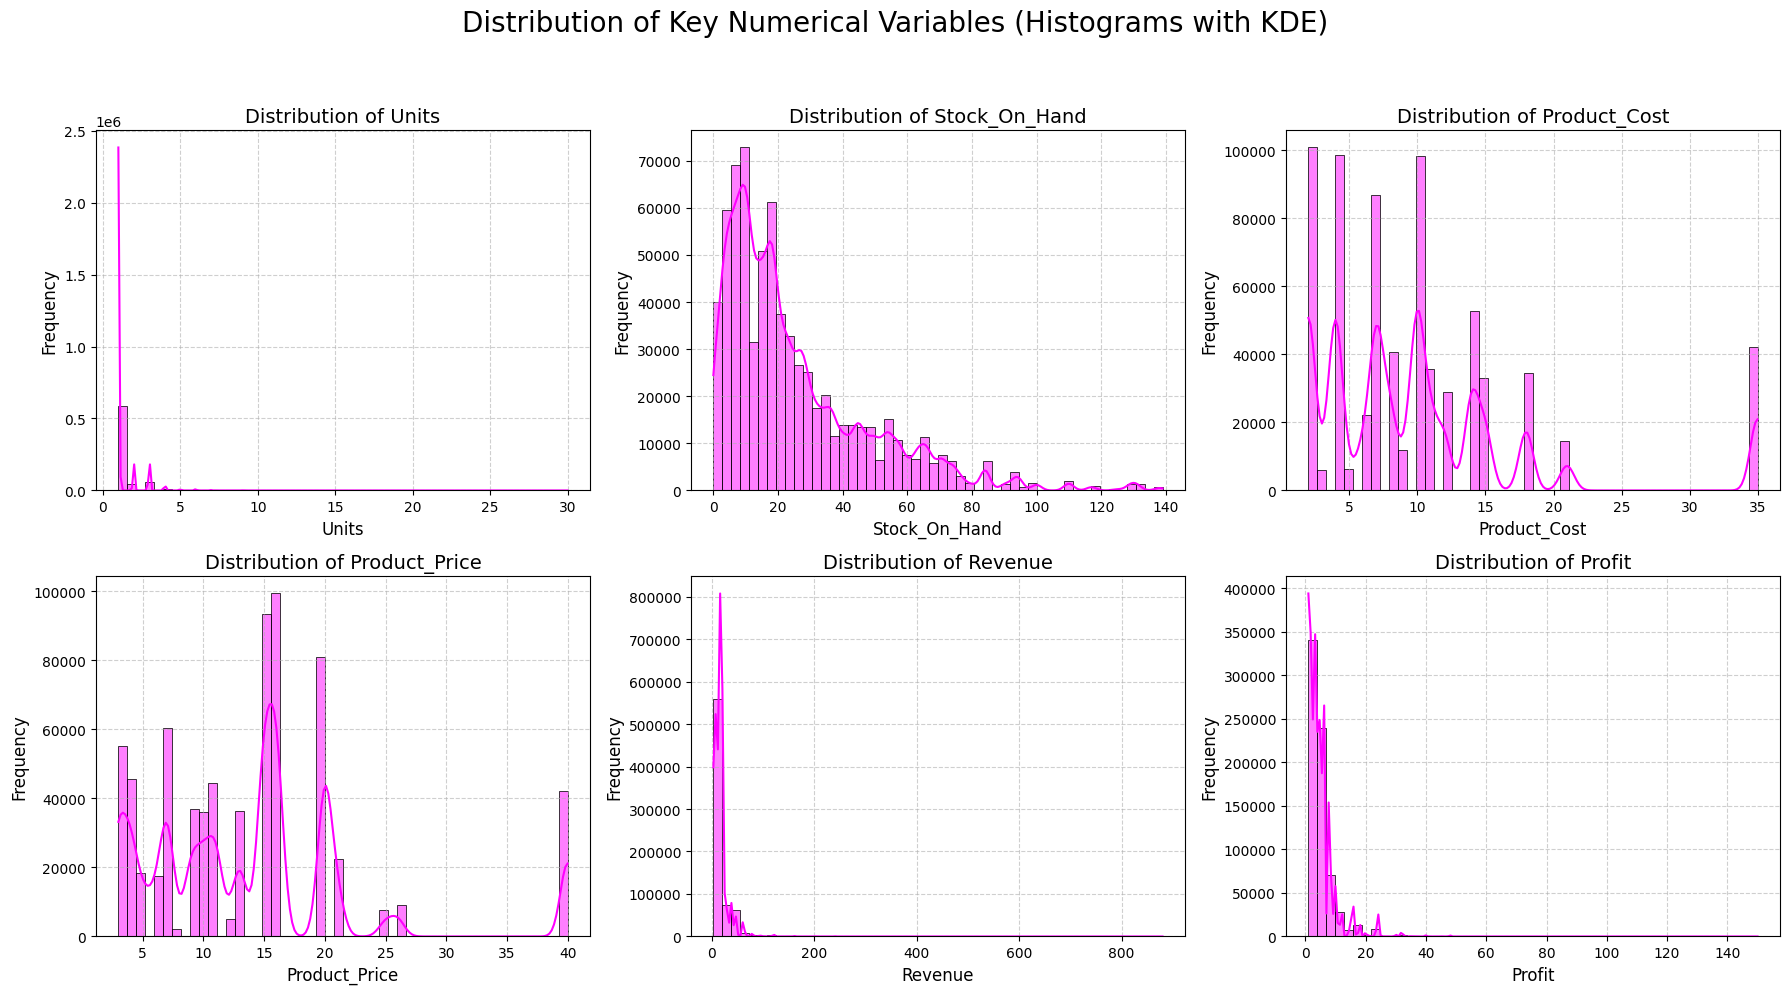

In [31]:
# --- Define the numerical columns to plot ---

columns_to_plot = ['Units', 'Stock_On_Hand', 'Product_Cost', 'Product_Price', 'Revenue', 'Profit']

# Set a professional plotting style
# sns.set_theme(style="whitegrid")

# Create a figure and a grid of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10)) # Adjust figsize as needed
axes = axes.flatten() # Flatten the 2x3 array of axes for easy iteration

fig.suptitle('Distribution of Key Numerical Variables (Histograms with KDE)', fontsize=20, y=1.02) # Main title for the entire figure

# Loop through each column and plot its histogram with KDE
for i, col in enumerate(columns_to_plot):
    # Use sns.histplot for histogram and KDE (Kernel Density Estimate)
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], bins=50, color='magenta', palette='Set1' , edgecolor='black')

    # Set title and labels for each subplot
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

    # Optional: Add grid for better readability
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # [left, bottom, right, top] for padding

# Display the plot
plt.show()

### Interpretaion

* Distribution of Units: The distribution is extremely right-skewed with a sharp peak at 1 unit, indicating that most transactions involve selling a single unit, with very few transactions selling multiple units.
* Distribution of Stock_On_Hand: This distribution is also highly right-skewed, showing that the majority of products have low stock levels (below 20 units), with a long tail indicating a few products have much higher stock.
* Distribution of Product_Cost: The product cost distribution is multimodal and somewhat irregular, with noticeable peaks at various common price points (e.g., around 2, 4, 8, 14, and 35 units of currency), suggesting distinct pricing tiers.
* Distribution of Product_Price: Similar to product cost, the product price distribution is multimodal, exhibiting multiple peaks (e.g., around 3, 7, 13, and 16 units of currency), which implies different price categories for products.
* Distribution of Revenue: The Revenue distribution is extremely right-skewed, sharply peaked near zero, indicating that most transactions generate very low revenue, with a long, thin tail extending to higher revenue amounts.
* Distribution of Profit: The Profit distribution is also extremely right-skewed, with a massive concentration at zero or very low profit values, and a very long tail representing a small number of highly profitable transactions.

### C. Visualization of Outliers using boxplot

* Variables - Units, Stock_On_Hand, Product_Cost, Product_Price, Revenue, Profit
* Objective - identify outliers and quartiles

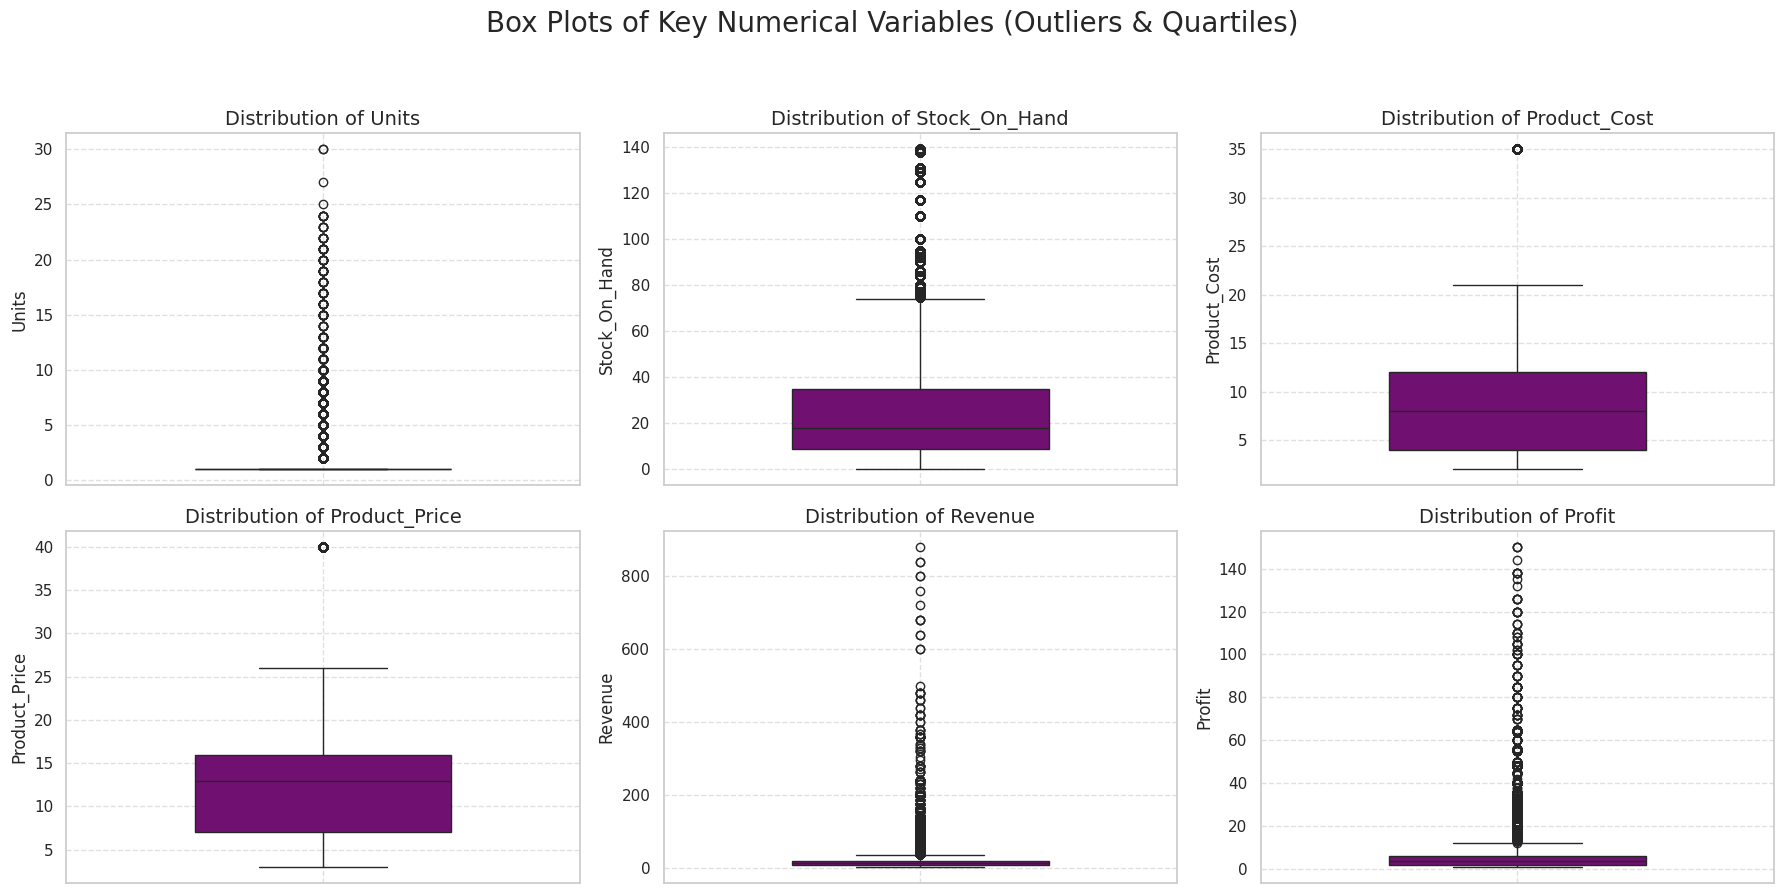

In [32]:
# --- Define the numerical columns to plot ---

columns_to_plot = ['Units', 'Stock_On_Hand', 'Product_Cost', 'Product_Price', 'Revenue', 'Profit']

# Set a professional plotting style
sns.set_theme(style="whitegrid")

# Create a figure and a grid of subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 9)) # Adjust figsize as needed
axes = axes.flatten() # Flatten the 2x3 array of axes for easy iteration

fig.suptitle('Box Plots of Key Numerical Variables (Outliers & Quartiles)', fontsize=20, y=1.02) # Main title for the entire figure

# Loop through each column and plot its box plot
for i, col in enumerate(columns_to_plot):
    # Use sns.boxplot for box plots
    sns.boxplot(data=df, y=col, ax=axes[i], color='purple', width=0.5)

    # Set title and labels for each subplot
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('') # No x-label needed as it's a single box plot
    axes[i].set_ylabel(col, fontsize=12)

    # Optional: Add grid for better readability
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # [left, bottom, right, top] for padding

# Display the plot
plt.show()

### Interpretation

* Distribution of Units: The majority of transactions involve a very small number of units (median 1), with numerous outliers indicating transactions with significantly higher unit counts.
* Distribution of Stock_On_Hand: Most products have low stock levels, but there are many individual products with much higher stock levels, appearing as outliers.
* Distribution of Product_Cost: Product costs are concentrated in the lower range (median around 8), but a substantial number of outliers exist at higher cost points.
* Distribution of Product_Price: Product prices are mostly clustered in the lower range (median around 13), with a significant number of transactions occurring at much higher outlier prices.
* Distribution of Revenue: Most transactions generate very low revenue, with a large number of high-revenue outliers dramatically extending the upper range.
* Distribution of Profit: The majority of transactions yield very low or zero profit, while a substantial number of transactions result in significantly higher profits, shown as outliers.

### D. Visualizing the discrete numerical variables

* Visualizing the product price distributions
* Visualizing the product cost distributions

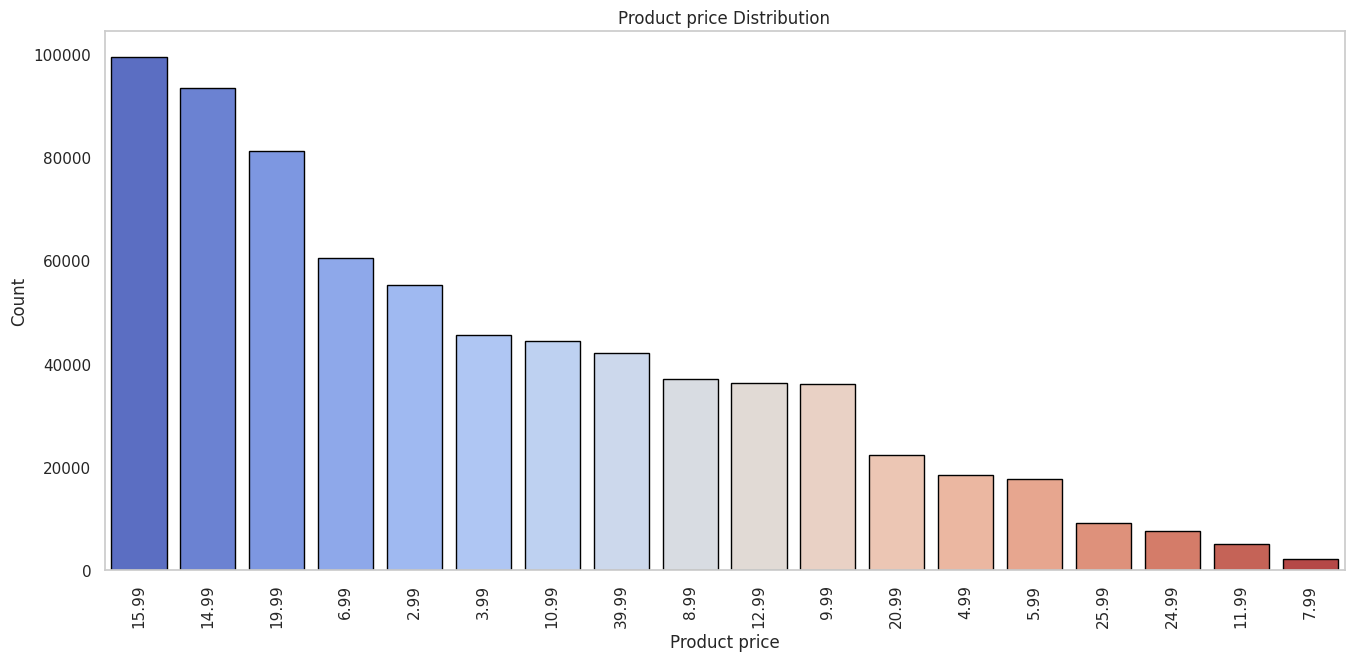

In [33]:
# Visualizing the product price distributions

plt.figure(figsize = (16,7))
sns.barplot(df['Product_Price'].value_counts() , palette = 'coolwarm' , edgecolor = 'black' , order = df['Product_Price'].value_counts().index)

plt.title('Product price Distribution')
plt.xlabel('Product price')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

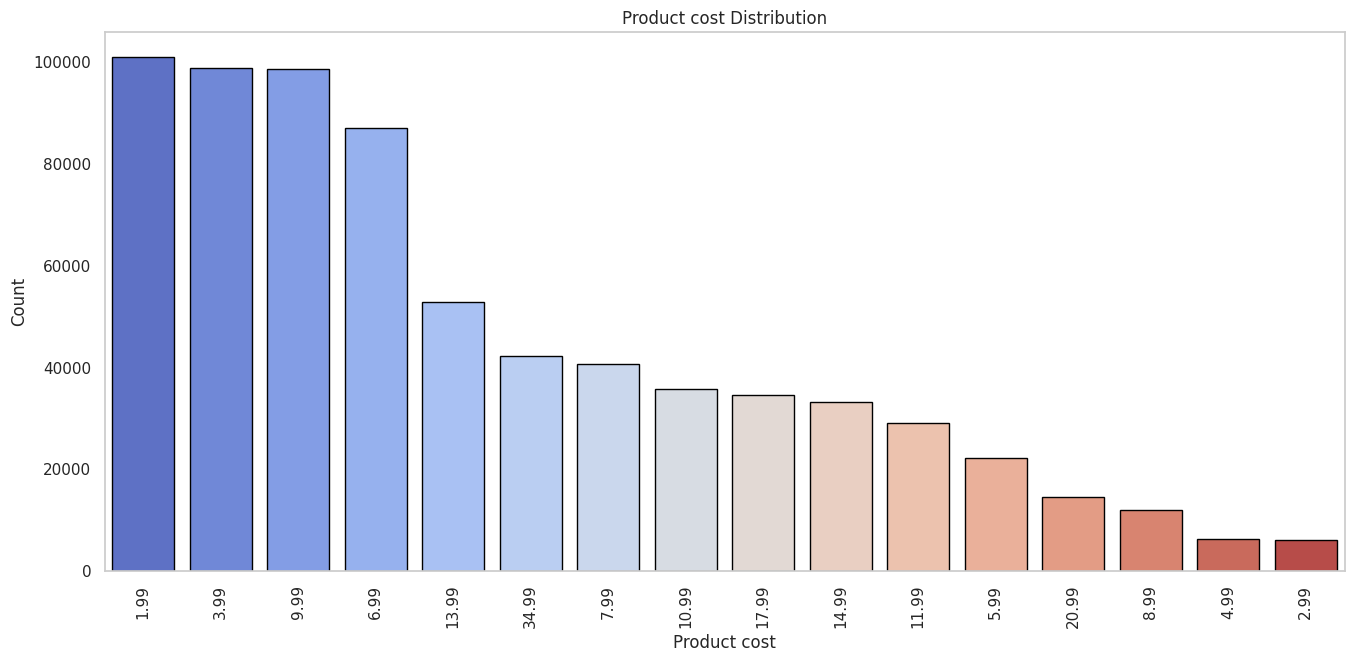

In [35]:
# Visualizing the product cost distributions

plt.figure(figsize = (16,7))
sns.barplot(df['Product_Cost'].value_counts() , palette = 'coolwarm' , edgecolor = 'black' , order = df['Product_Cost'].value_counts().index)

plt.title('Product cost Distribution')
plt.xlabel('Product cost')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

# 8. Exploratory Data Analysis - Univariate Analysis of Categorical Variables

In [36]:
# Categorical Variables (Product_Name, Product_Category, Store_Name, Store_City, Store_Location)

### A. Quantitative analysis

* What are the most frequent Product_Names and Product_Categorys? What is their count/percentage?
* How many unique Store_Names, Store_Citys, and Store_Locations are there?
* What is the distribution of Workclass, Education, Marital Status, etc., in terms of counts and proportions?


In [37]:
print("--- Univariate Analysis of Categorical Columns ---")

# 1. Most frequent Product_Names and Product_Categorys (count/percentage)

print("\n1. Frequency and Percentage of 'Product_Name':")
print(df['Product_Name'].value_counts())
print("\nPercentage of 'Product_Name':")
print(df['Product_Name'].value_counts(normalize=True) * 100) # Multiply by 100 for percentage

print("\n" + "="*50)

print("\nFrequency and Percentage of 'Product_Category':")
print(df['Product_Category'].value_counts())
print("\nPercentage of 'Product_Category':")
print(df['Product_Category'].value_counts(normalize=True) * 100)

# 2. Number of unique Store_Names, Store_Citys, and Store_Locations

print("\n" + "="*50)
print("\n2. Number of Unique Values for Store-related Columns:")
print(f"   Number of unique 'Store_Name's: {df['Store_Name'].nunique()}")
print(f"   Number of unique 'Store_City's: {df['Store_City'].nunique()}")
print(f"   Number of unique 'Store_Location's: {df['Store_Location'].nunique()}")

# 3. Distribution of Workclass, Education, Marital Status, etc. (counts and proportions)

print("\n" + "="*50)
print("\n3. Distribution (Counts and Proportions) of Key Categorical Columns:")

categorical_columns = [
    'Product_Name', 'Product_Category', 'Store_Name', 'Store_City', 'Store_Location'
]

for col in categorical_columns:
    print(f"\n--- Distribution for '{col}' ---")
    print("Counts:")
    print(df[col].value_counts(dropna=False)) # dropna=False to include NaN counts
    print("\nProportions (%):")
    print(df[col].value_counts(normalize=True, dropna=False) * 100)
    print("-" * 30) # Separator for clarity between columns

--- Univariate Analysis of Categorical Columns ---

1. Frequency and Percentage of 'Product_Name':
Product_Name
Colorbuds                66767
Deck Of Cards            60396
PlayDoh Can              55316
Barrel O' Slime          45482
Action Figure            44988
Lego Bricks              42021
Splash Balls             37005
Rubik's Cube             34550
Magic Sand               30760
Animal Figures           27905
Dart Gun                 23612
Dino Egg                 22390
Glass Marbles            22074
Dinosaur Figures         21126
Mini Ping Pong Set       20169
Nerf Gun                 19910
Kids Makeup Kit          19576
PlayDoh Toolkit          18421
Hot Wheels 5-Pack        17646
Gamer Headphones         13234
Toy Robot                 9242
Etch A Sketch             9134
Mr. Potatohead            6246
Jenga                     6065
Supersoaker Water Gun     5404
Teddy Bear                5318
PlayDoh Playset           5257
Foam Disk Launcher        5076
Plush Pony          

### B. Visualization using Bar Plots (Count Plots)

* Variables - Product_Name, Product_Category, Store_Name, Store_City, Store_Location
* Objective - showing the frequency distribution of each category.

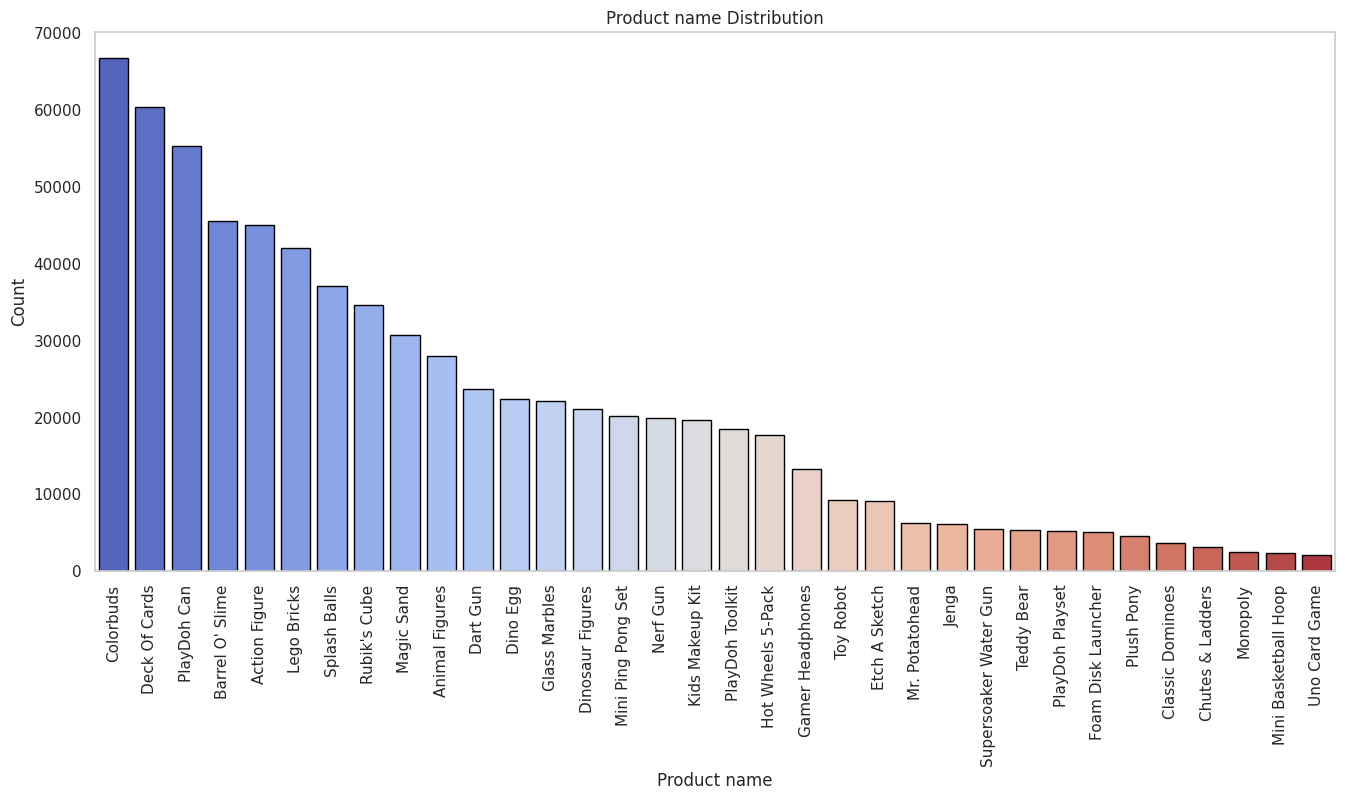

In [38]:
# Visualizing the product name distributions

plt.figure(figsize = (16,7))
sns.barplot(df['Product_Name'].value_counts() , palette = 'coolwarm' , edgecolor = 'black')

plt.title('Product name Distribution')
plt.xlabel('Product name')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

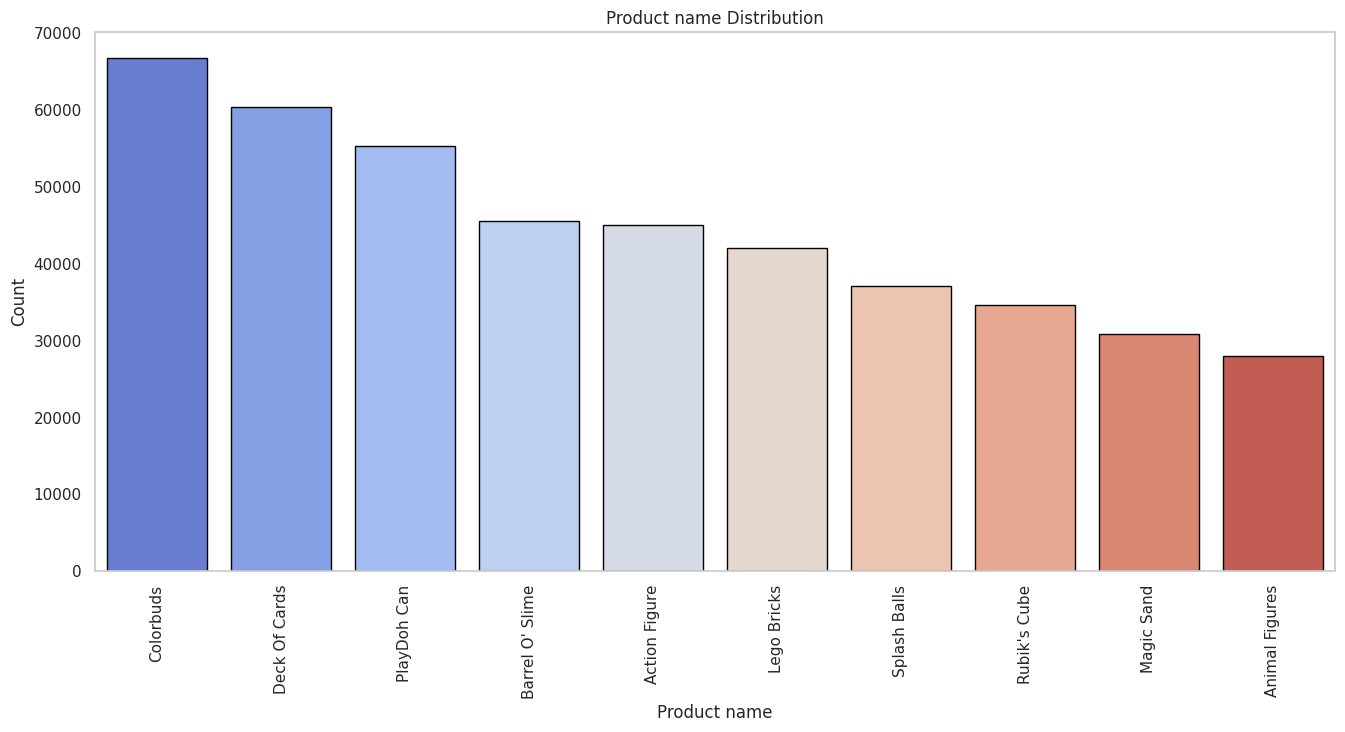

In [39]:
# Visualizing the product name distributions ( TOP 10)

plt.figure(figsize = (16,7))
sns.barplot(df['Product_Name'].value_counts().head(10) , palette = 'coolwarm' , edgecolor = 'black')

plt.title('Product name Distribution')
plt.xlabel('Product name')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

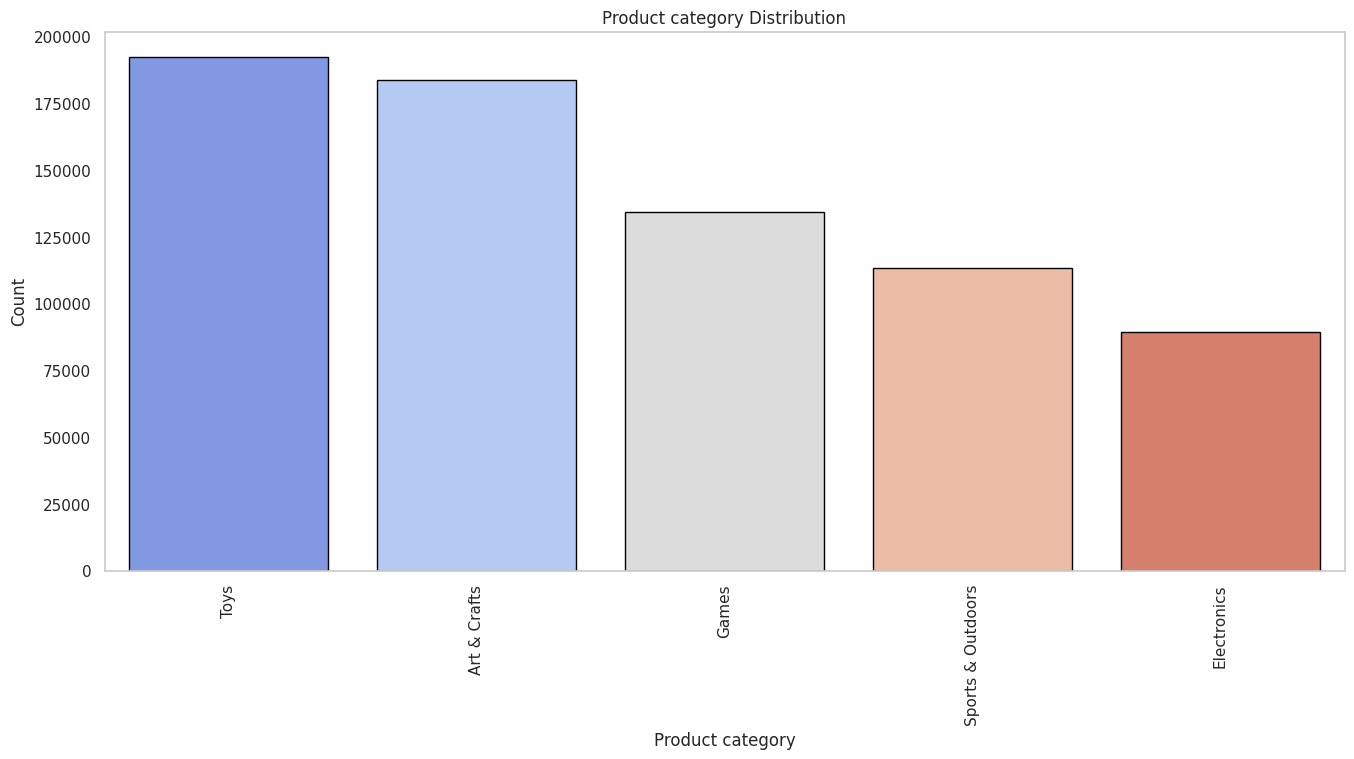

In [40]:
# Visualizing the product category distributions

plt.figure(figsize = (16,7))
sns.barplot(df['Product_Category'].value_counts() , palette = 'coolwarm' , edgecolor = 'black')

plt.title('Product category Distribution')
plt.xlabel('Product category')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

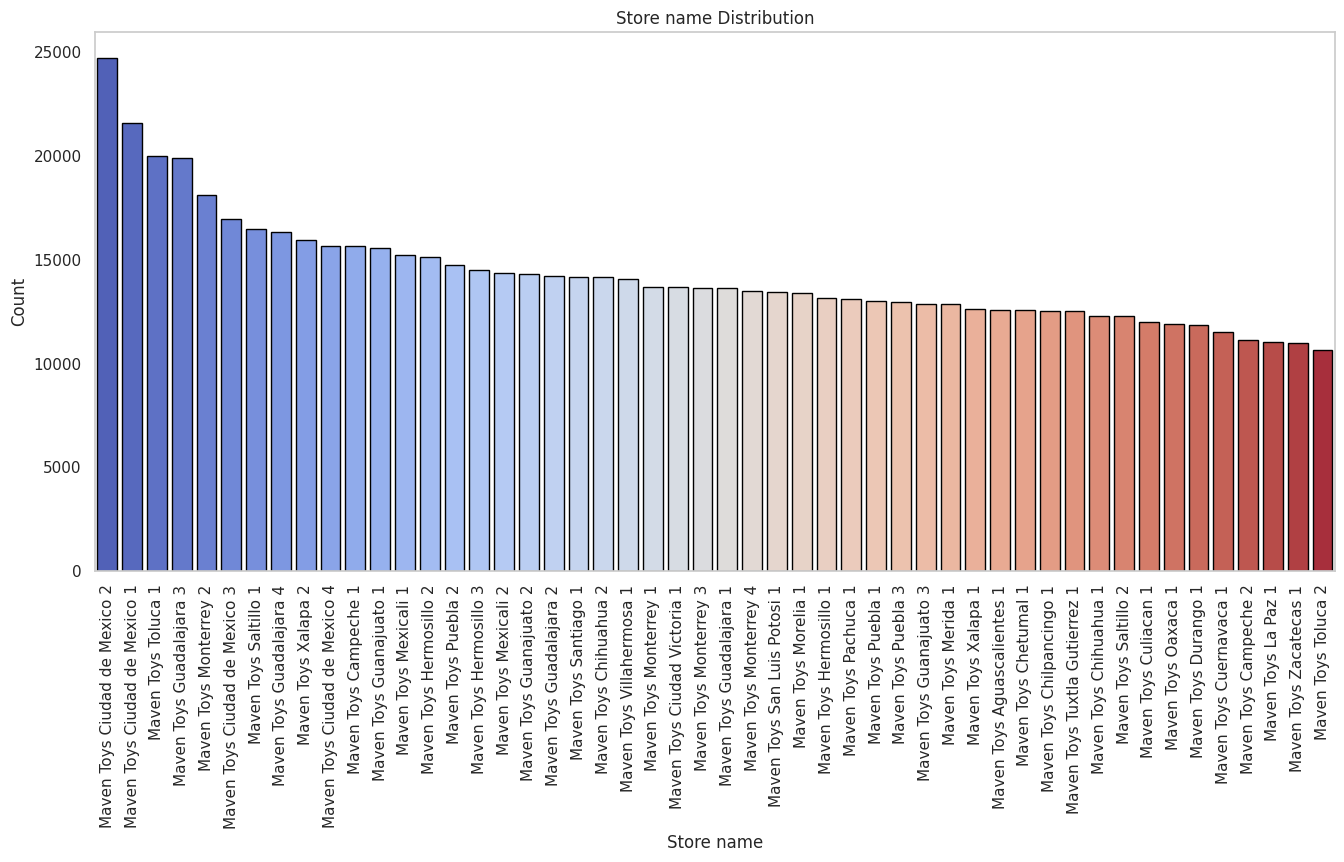

In [41]:
# Visualizing the Store Name distributions

plt.figure(figsize = (16,7))
sns.barplot(df['Store_Name'].value_counts() , palette = 'coolwarm' , edgecolor = 'black')

plt.title('Store name Distribution')
plt.xlabel('Store name')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

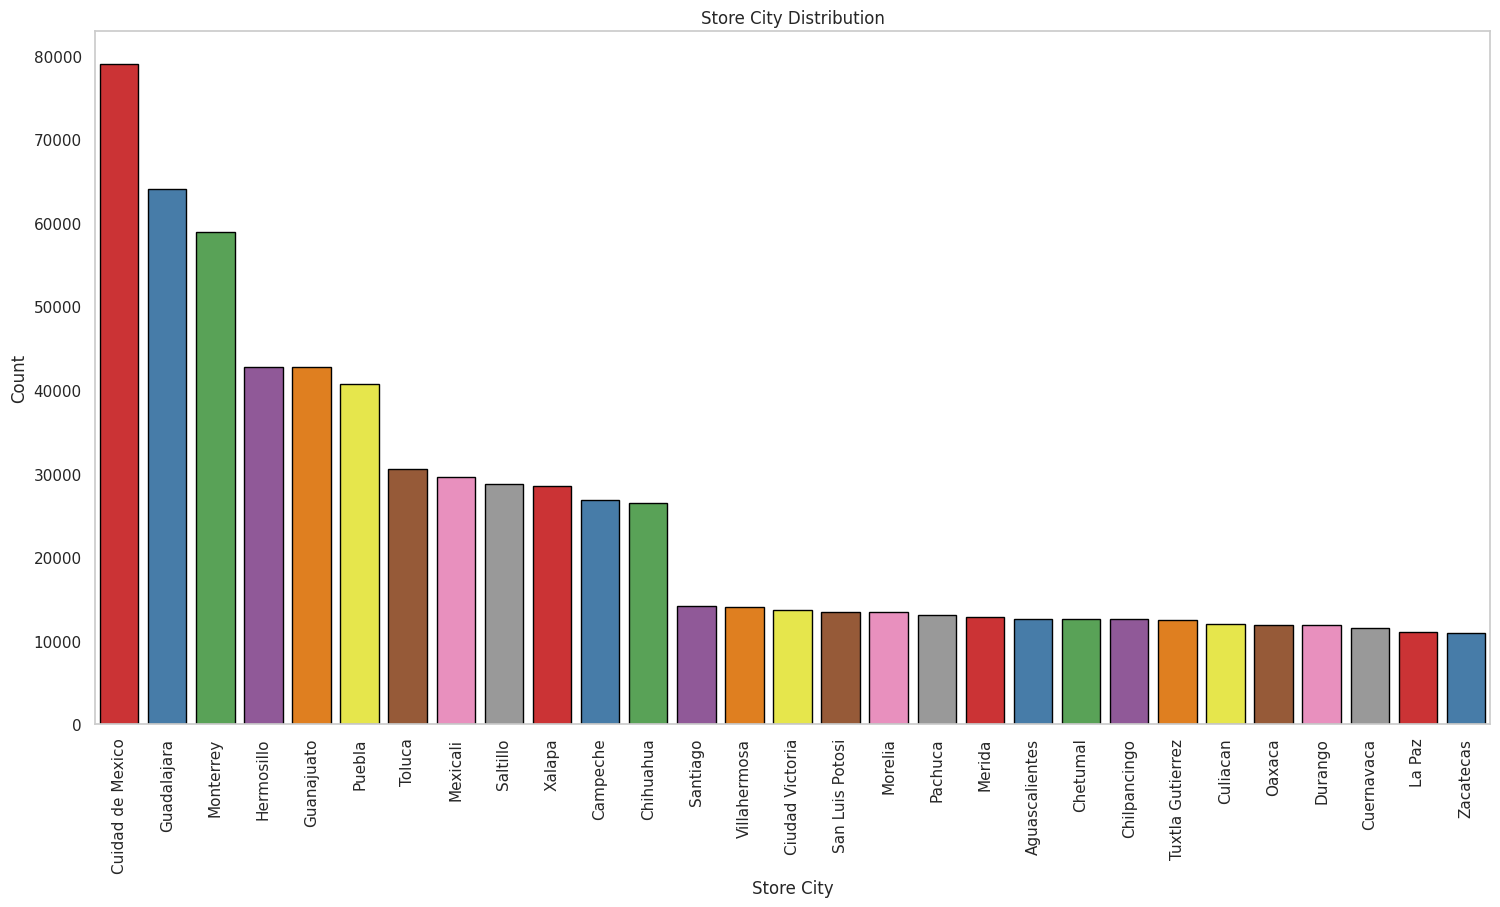

In [44]:
# Visualizing the store city distributions

plt.figure(figsize = (18,9))
sns.barplot(df['Store_City'].value_counts() , palette = 'Set1' , edgecolor = 'black')

plt.title('Store City Distribution')
plt.xlabel('Store City')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

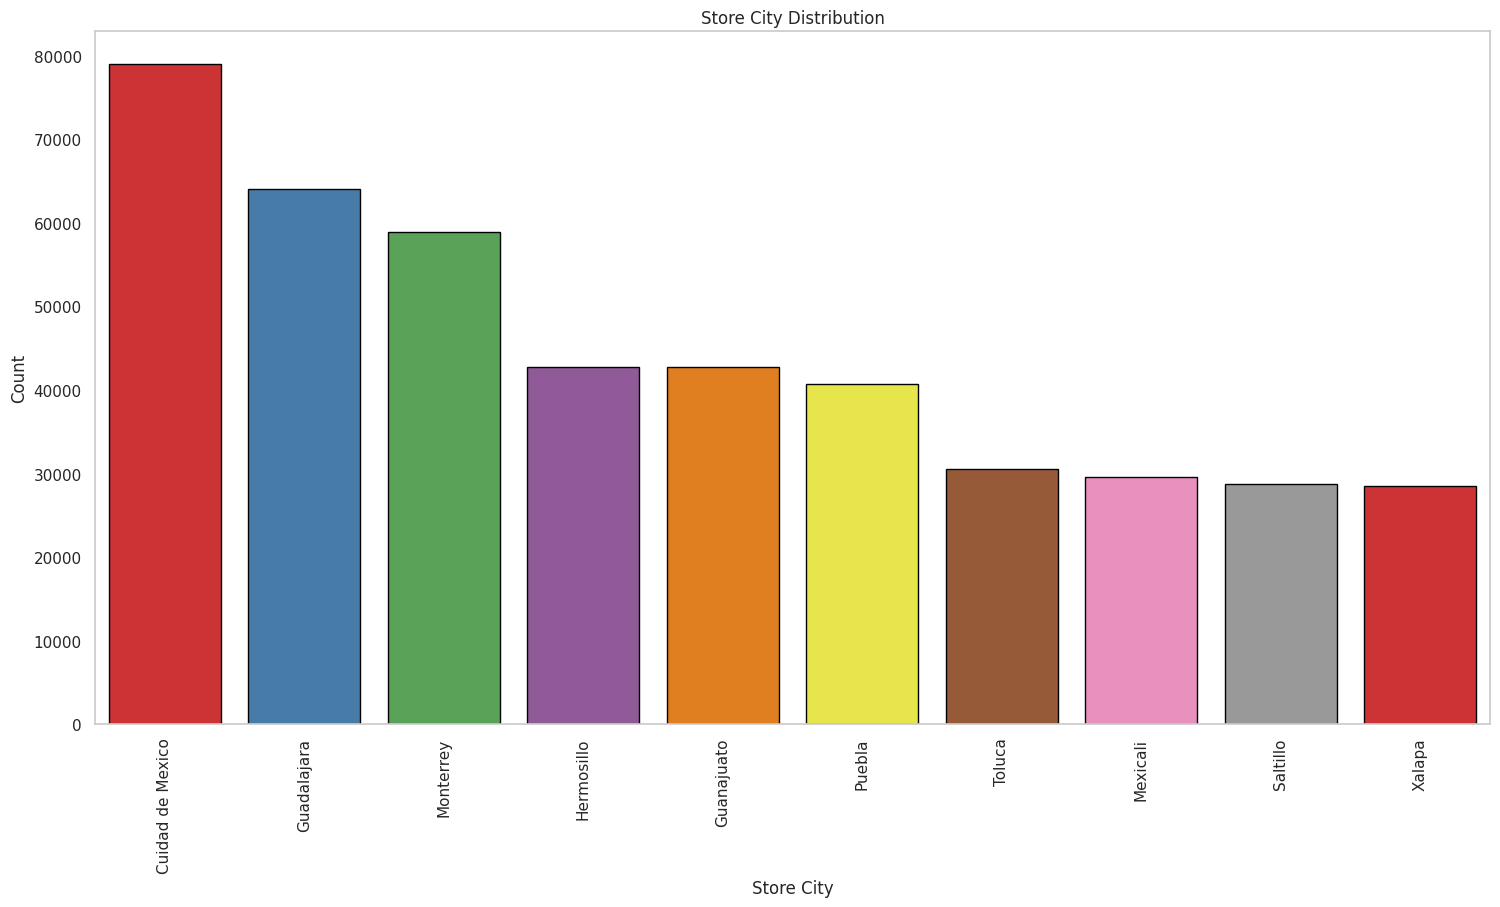

In [45]:
# Visualizing the store city distributions ( TOP 10)

plt.figure(figsize = (18,9))
sns.barplot(df['Store_City'].value_counts().head(10) , palette = 'Set1' , edgecolor = 'black')

plt.title('Store City Distribution')
plt.xlabel('Store City')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

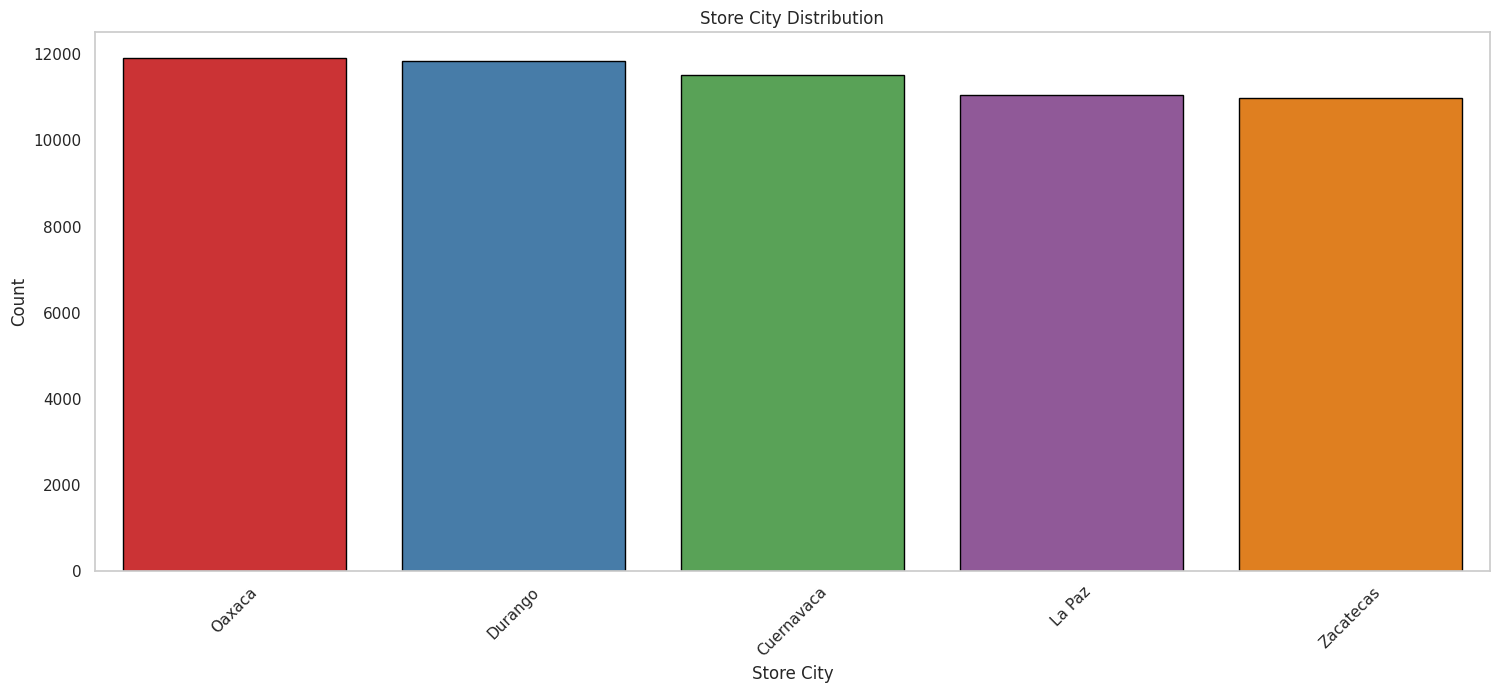

In [46]:
# Visualizing the store city distributions ( Bottom 5)

plt.figure(figsize = (18,7))
sns.barplot(df['Store_City'].value_counts().tail() , palette = 'Set1' , edgecolor = 'black')

plt.title('Store City Distribution')
plt.xlabel('Store City')
plt.ylabel('Count')
plt.grid(False)
plt.xticks(rotation = 45)
plt.grid(False)
plt.show()

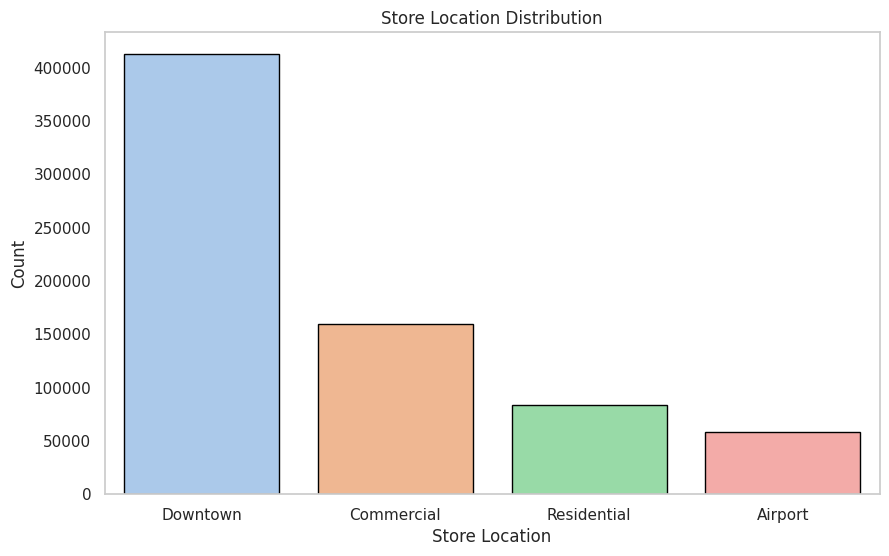

In [47]:
# Visualizing the store location distributions

plt.figure(figsize = (10,6))
sns.barplot(df['Store_Location'].value_counts() , palette = 'pastel' , edgecolor = 'black')

plt.title('Store Location Distribution')
plt.xlabel('Store Location')
plt.ylabel('Count')
plt.grid(False)
plt.show()

### C. Visualization using Donut chart

* Variables -  Product_Category, Product_Name , Store_City , Store_Location
* Objective - For the top N categories show proportional representation.

In [48]:
# Define the utility function

def plot_categorical_donut(dataframe, column_name, n_categories=7, figsize=(10, 10)):
    """
    Generates and displays a donut chart for the top N categories of a specified column.

    Parameters:
    dataframe (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the categorical column to plot.
    n_categories (int): The number of top categories to display explicitly.
                        Remaining categories will be grouped into 'Other'.
    figsize (tuple): A tuple (width, height) for the figure size.
    """
    if column_name not in dataframe.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    # Calculate value counts
    counts = dataframe[column_name].value_counts()

    # Prepare data for plotting: select top N and sum the rest into 'Other'
    if len(counts) > n_categories:
        top_n = counts.head(n_categories)
        other_sum = counts.iloc[n_categories:].sum()
        if other_sum > 0:
            plot_data = pd.concat([top_n, pd.Series({'Other': other_sum})])
        else:
            plot_data = top_n
    else:
        plot_data = counts

    # Define colors
    colors = sns.color_palette('pastel', n_colors=len(plot_data))
    if 'Other' in plot_data.index:
        colors = sns.color_palette('pastel', n_colors=len(plot_data) - 1) + ['gray'] # Distinct color for 'Other'

    # Create figure and axis for the plot
    fig, ax = plt.subplots(figsize=figsize)

    # Plotting the donut chart
    wedges, texts, autotexts = ax.pie(
        plot_data,
        labels=plot_data.index,
        autopct='%1.1f%%',       # Format percentages
        startangle=90,           # Start at the top
        colors=colors,
        pctdistance=0.8,         # Position of percentage labels (closer to center of donut hole)
        labeldistance=1.05,      # Position of category labels (outside the donut)
        wedgeprops=dict(width=0.4, edgecolor='black', linewidth=1) # Donut hole via width
    )

    # Customize percentage labels
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(12)
        autotext.set_fontweight('bold')

    # Customize category labels
    for text in texts:
        text.set_fontsize(12)

    # Set title
    ax.set_title(f'Proportional Distribution of Top {n_categories} {column_name} Categories', fontsize=16, fontweight='bold')
    ax.axis('equal') # Ensure circle

    plt.tight_layout()
    plt.show()

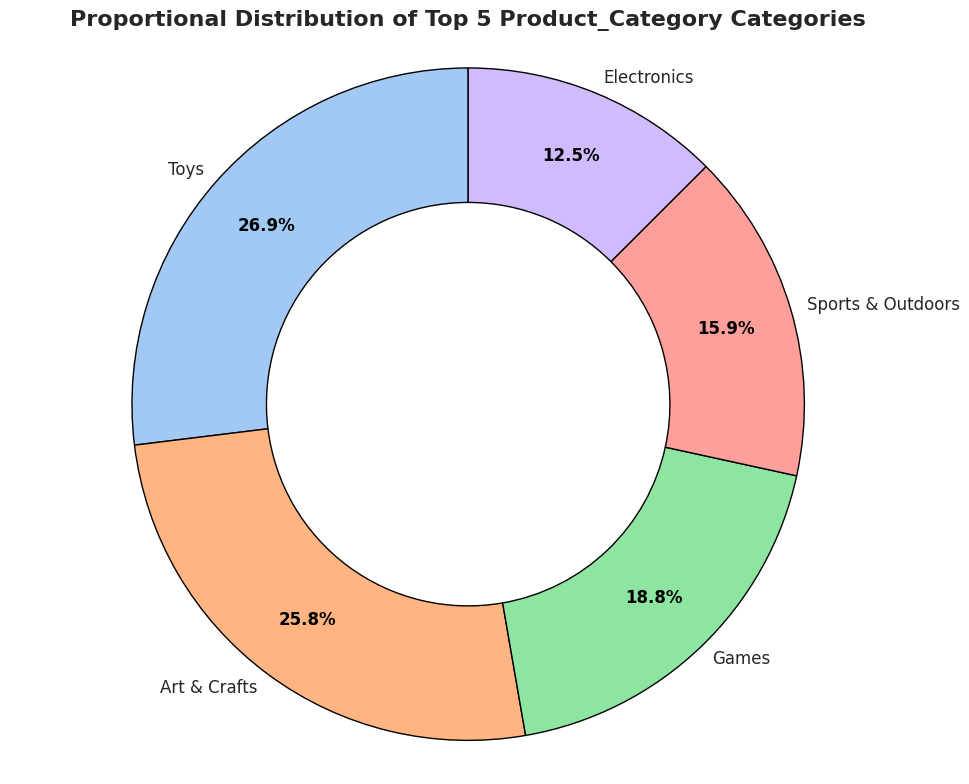

In [49]:
# Donut Chart for Product_Category (Top 5)

plot_categorical_donut(df, 'Product_Category', n_categories=5 , figsize=(10,8))

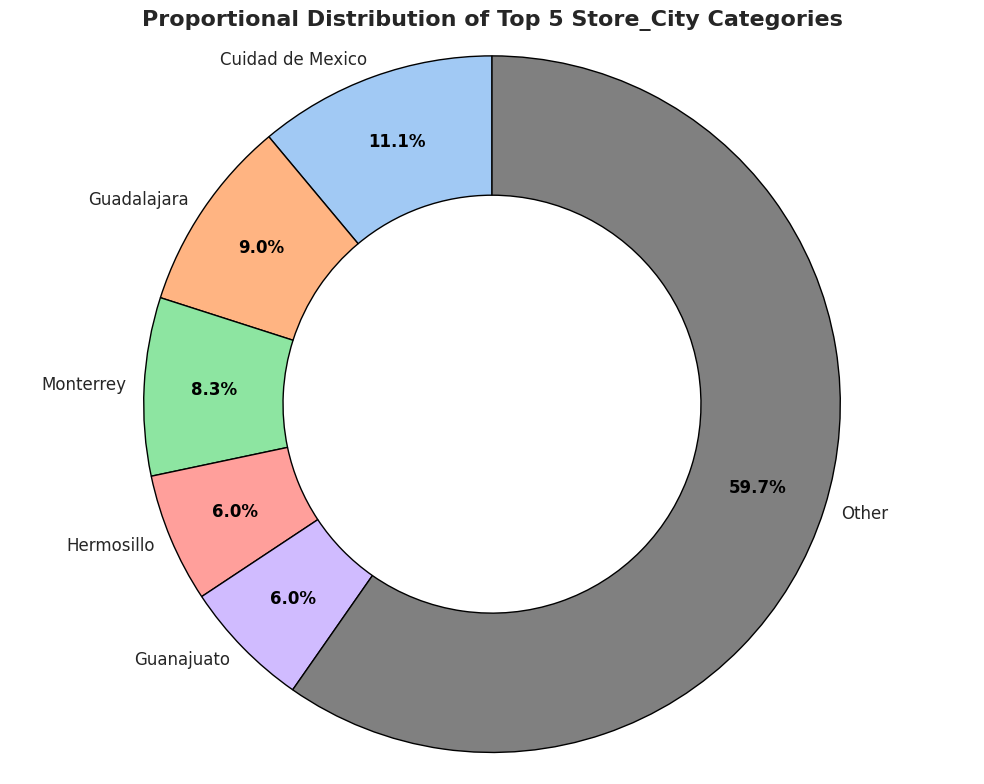

In [50]:
# Donut Chart for Store_City (Top 5)

plot_categorical_donut(df, 'Store_City', n_categories=5, figsize=(10,8))

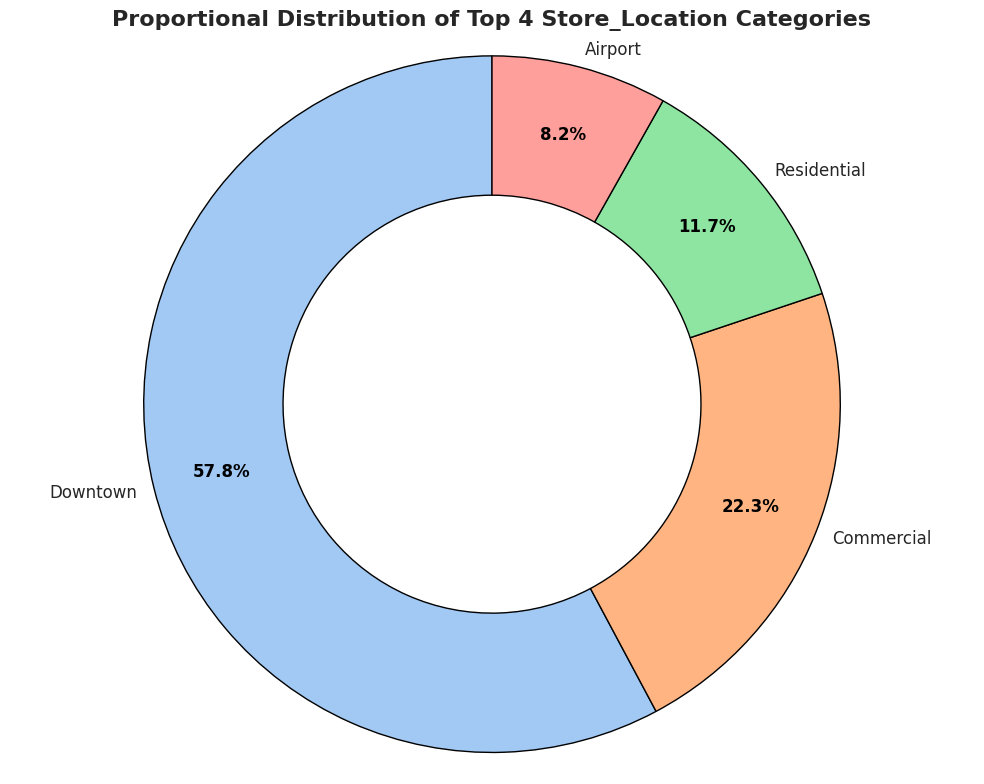

In [51]:
# Donut Chart for Store_Location (All Categories)

plot_categorical_donut(df, 'Store_Location', n_categories=df['Store_Location'].nunique() , figsize=(10,8))

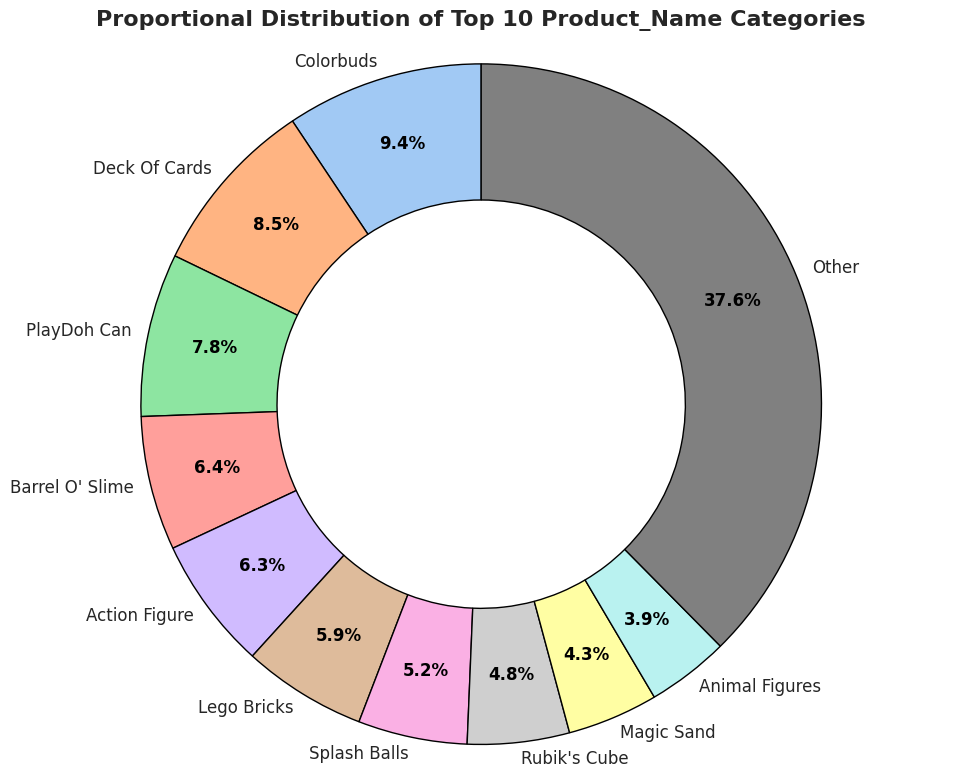

In [52]:
# Example for a column with many unique values, showing only top 10
# Donut Chart for Product_Name (Top 10)

plot_categorical_donut(df, 'Product_Name', n_categories=10, figsize=(10,8))

# 9. Exploratory Data Analysis - Univariate Analysis of Temporal variables

In [53]:
# Temporal variables - Date , Store_Open_Date

### A. Quantitative Analysis

* What is the date range of the dataset?
* How many transactions occurred on each day/month/quarter of 2022?
* How many transactions occurred on each day/month/quarter of 2023?

In [54]:
# Assume 'df' DataFrame is already loaded and contains the specified columns,
# especially the 'Date' column as datetime64[ns].

# --- 1. What is the date range of the dataset? ---
print("--- 1. Date Range of the Dataset ---")
min_date = df['Date'].min()
max_date = df['Date'].max()

print(f"  Start Date: {min_date.strftime('%Y-%m-%d')}")
print(f"  End Date:   {max_date.strftime('%Y-%m-%d')}")

--- 1. Date Range of the Dataset ---
  Start Date: 2022-01-01
  End Date:   2023-07-14


In [55]:
# --- 2. How many transactions occurred on each day/month/quarter of 2022? ---

print("\n--- 2. Transaction Counts by Day, Month, and Quarter (for 2022) ---")

# Filter for the year 2022 if the dataset contains other years.
# Assuming 'Date' is already cleaned and correctly parsed.
df_2022 = df[df['Date'].dt.year == 2022].copy()

if df_2022.empty:
    print("No data found for the year 2022 in the 'Date' column. Please check your data or adjust the year.")
else:
    # Transactions per Day
    print("\n  Transactions per Day (Top 5 busiest days):")
    daily_transactions = df_2022['Date'].dt.date.value_counts().sort_index() # .dt.date to get just date part
    print(daily_transactions.sort_values(ascending=False).head()) # Show top 5 busiest days
    print(f"    ... (showing top 5 out of {len(daily_transactions)} unique days)")

    # Transactions per Month
    print("\n  Transactions per Month:")
    monthly_transactions = df_2022['Date'].dt.to_period('M').value_counts().sort_index()
    print(monthly_transactions)

    # Transactions per Quarter
    print("\n  Transactions per Quarter:")
    quarterly_transactions = df_2022['Date'].dt.to_period('Q').value_counts().sort_index()
    print(quarterly_transactions)


--- 2. Transaction Counts by Day, Month, and Quarter (for 2022) ---

  Transactions per Day (Top 5 busiest days):
Date
2022-12-24    2432
2022-04-30    2363
2022-12-31    2165
2022-12-25    2074
2022-11-25    2017
Name: count, dtype: int64
    ... (showing top 5 out of 365 unique days)

  Transactions per Month:
Date
2022-01    29509
2022-02    28610
2022-03    31365
2022-04    35711
2022-05    36691
2022-06    35036
2022-07    34324
2022-08    30697
2022-09    32598
2022-10    35970
2022-11    38676
2022-12    47856
Freq: M, Name: count, dtype: int64

  Transactions per Quarter:
Date
2022Q1     89484
2022Q2    107438
2022Q3     97619
2022Q4    122502
Freq: Q-DEC, Name: count, dtype: int64


In [56]:
# --- 3. How many transactions occurred on each day/month/quarter of 2023? ---

print("\n--- 3. Transaction Counts by Day, Month, and Quarter (for 2023) ---")

# Filter for the year 2023 if the dataset contains other years.
# Assuming 'Date' is already cleaned and correctly parsed.
df_2023 = df[df['Date'].dt.year == 2023].copy()

if df_2023.empty:
    print("No data found for the year 2023 in the 'Date' column. Please check your data or adjust the year.")
else:
    # Transactions per Day
    print("\n  Transactions per Day (Top 5 busiest days):")
    daily_transactions = df_2023['Date'].dt.date.value_counts().sort_index() # .dt.date to get just date part
    print(daily_transactions.sort_values(ascending=False).head()) # Show top 5 busiest days
    print(f"    ... (showing top 5 out of {len(daily_transactions)} unique days)")

    # Transactions per Month
    print("\n  Transactions per Month:")
    monthly_transactions = df_2023['Date'].dt.to_period('M').value_counts().sort_index()
    print(monthly_transactions)

    # Transactions per Quarter
    print("\n  Transactions per Quarter:")
    quarterly_transactions = df_2023['Date'].dt.to_period('Q').value_counts().sort_index()
    print(quarterly_transactions)


--- 3. Transaction Counts by Day, Month, and Quarter (for 2023) ---

  Transactions per Day (Top 5 busiest days):
Date
2023-04-30    3071
2023-03-30    2440
2023-04-29    2419
2023-06-17    2378
2023-01-06    2337
Name: count, dtype: int64
    ... (showing top 5 out of 195 unique days)

  Transactions per Month:
Date
2023-01    41989
2023-02    40182
2023-03    49489
2023-04    47417
2023-05    48295
2023-06    48059
2023-07    20873
Freq: M, Name: count, dtype: int64

  Transactions per Quarter:
Date
2023Q1    131660
2023Q2    143771
2023Q3     20873
Freq: Q-DEC, Name: count, dtype: int64


### B. Timeseries visualization

* Timeseries visualization of Daily Units sold over the complete period
* Timeseries visualization of Monthly Units sold over the complete period
* Timeseries visualization of Quarterly Units sold over the complete period
* Timeseries visualization of Daily Revenue  over the complete period
* Timeseries visualization of Monthly Revenue over the complete period
* Timeseries visualization of Quarterly Revenue over the complete period
* Timeseries visualization of Daily Profit over the complete period
* Timeseries visualization of Monthly Profit over the complete period
* Timeseries visualization of Quarterly Profit over the complete period

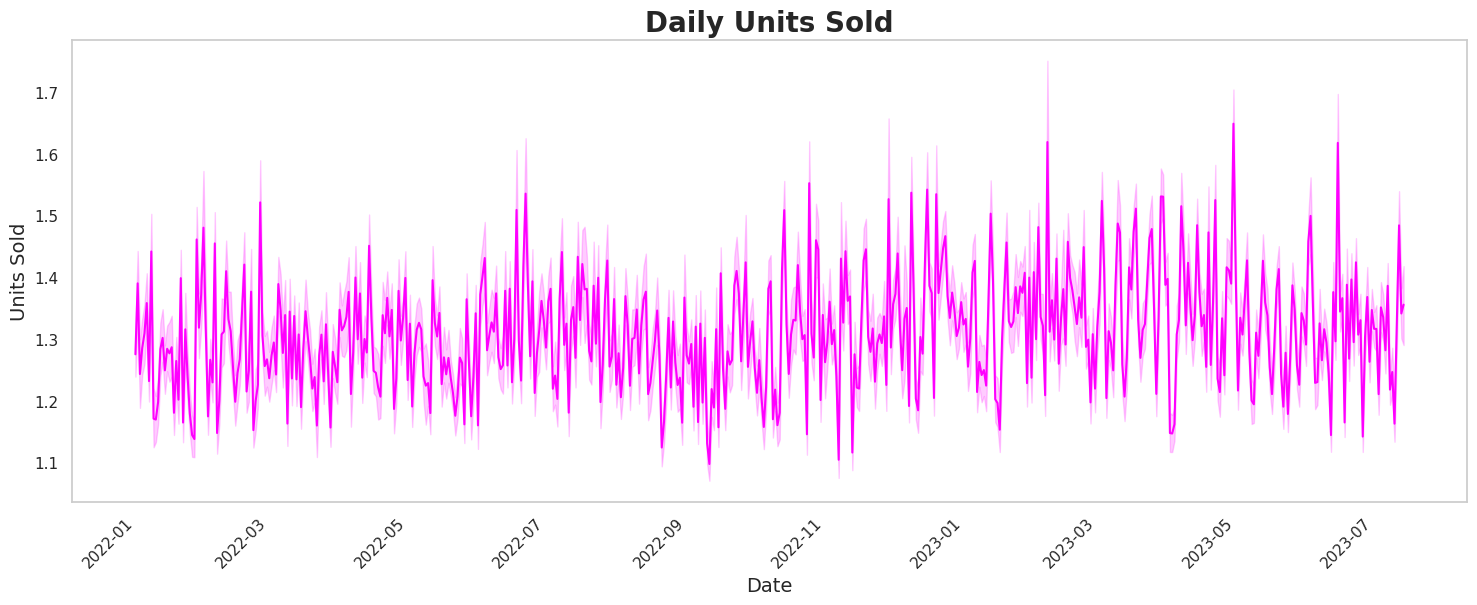

In [57]:
# Timeseries visualization of Daily Units sold over the complete period

plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Units', data=df, color='magenta', linewidth=1.5)

plt.title('Daily Units Sold', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Units Sold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

### Interpretation

The "Daily Units Sold" chart exhibits a consistent daily fluctuation with no clear long-term upward or downward trend across the observed period (2022-2023), but it suggests a recurring weekly or monthly pattern where units sold tend to spike at regular intervals.

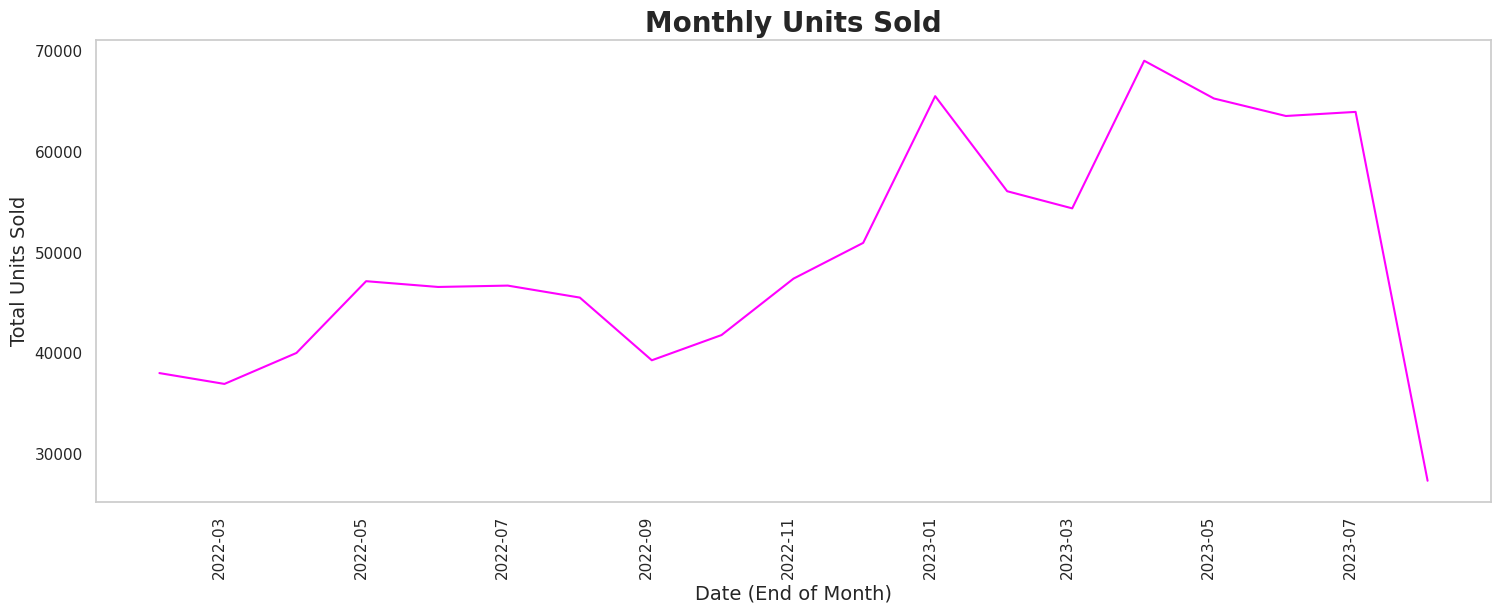

In [58]:
# --- Prepare data for Monthly Units Sold ---
# Set 'Date' as index, resample by 'M' (month end) and sum 'Units'.
# .reset_index() converts the aggregated Series back into a DataFrame
# with 'Date' as a regular column.
monthly_units_summary = df.set_index('Date')['Units'].resample('M').sum().reset_index()


# --- Plotting Monthly Units Sold ---
plt.figure(figsize=(18, 6))

sns.lineplot(
    x='Date',
    y='Units',
    data=monthly_units_summary, # Use the monthly aggregated data
    color='magenta',
    linewidth=1.5
)

plt.title('Monthly Units Sold', fontsize=20, fontweight='bold')
plt.xlabel('Date (End of Month)', fontsize=14) # Changed label to reflect monthly aggregation
plt.ylabel('Total Units Sold', fontsize=14) # Changed label to reflect total units
plt.xticks(rotation=90, ha='right')
plt.grid(False) # Added grid for time series readability
plt.show()

### Interpretation

The "Monthly Units Sold" chart reveals a fluctuating overall trend with significant seasonality, notably showing a dip in mid-2022, a strong peak around late 2022/early 2023, another peak in mid-2023, and a sharp decline towards the end of the visible period.

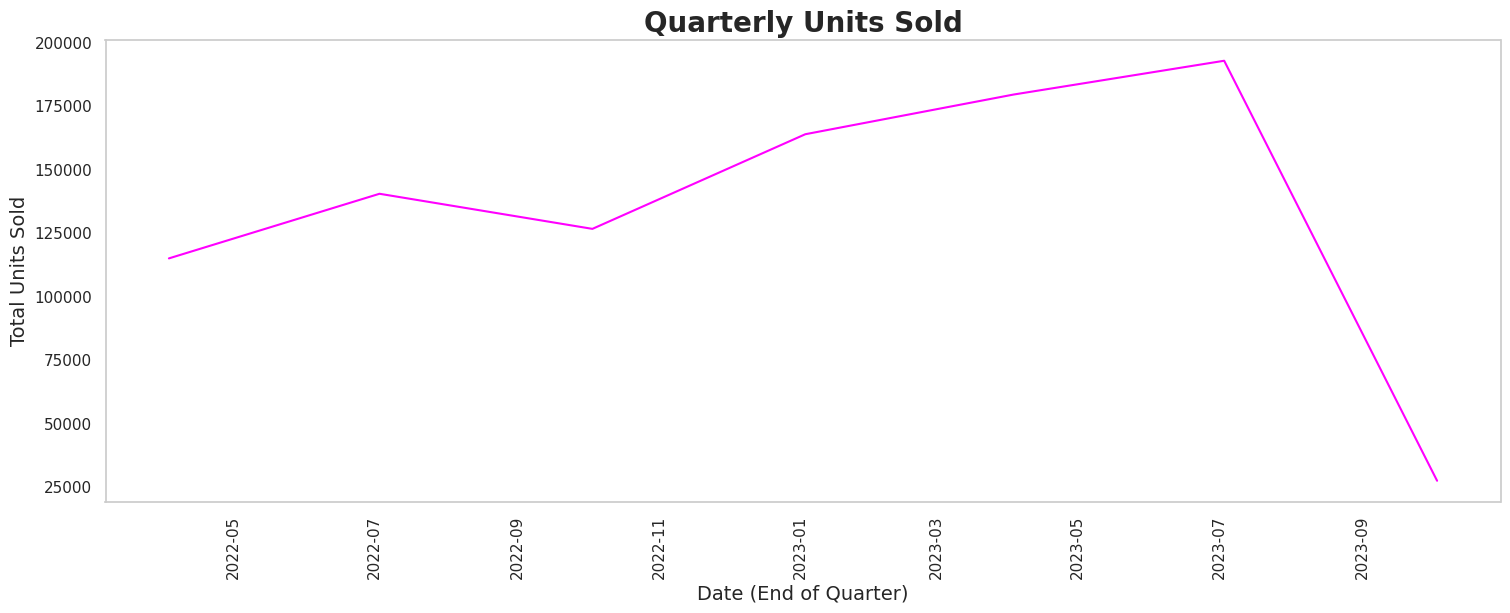

In [59]:
# --- Prepare data for Quarterly Units Sold ---
# Set 'Date' as index, resample by 'Q' (Quarter end) and sum 'Units'.
# .reset_index() converts the aggregated Series back into a DataFrame
# with 'Date' as a regular column.
quarterly_units_summary = df.set_index('Date')['Units'].resample('Q').sum().reset_index()


# --- Plotting Quarterly Units Sold ---
plt.figure(figsize=(18, 6))

sns.lineplot(
    x='Date',
    y='Units',
    data=quarterly_units_summary, # Use the quarterly aggregated data
    color='magenta',
    linewidth=1.5
)

plt.title('Quarterly Units Sold', fontsize=20, fontweight='bold')
plt.xlabel('Date (End of Quarter)', fontsize=14) # Changed label to reflect quarterly aggregation
plt.ylabel('Total Units Sold', fontsize=14) # Changed label to reflect total units
plt.xticks(rotation=90, ha='right')
plt.grid(False) # Added grid for time series readability
plt.show()

### Interpretation

The "Quarterly Units Sold" chart indicates a generally increasing trend in units sold from mid-2022 to mid-2023, followed by a dramatic drop in the last observed quarter, highlighting significant fluctuations rather than consistent seasonal patterns at the quarterly level.

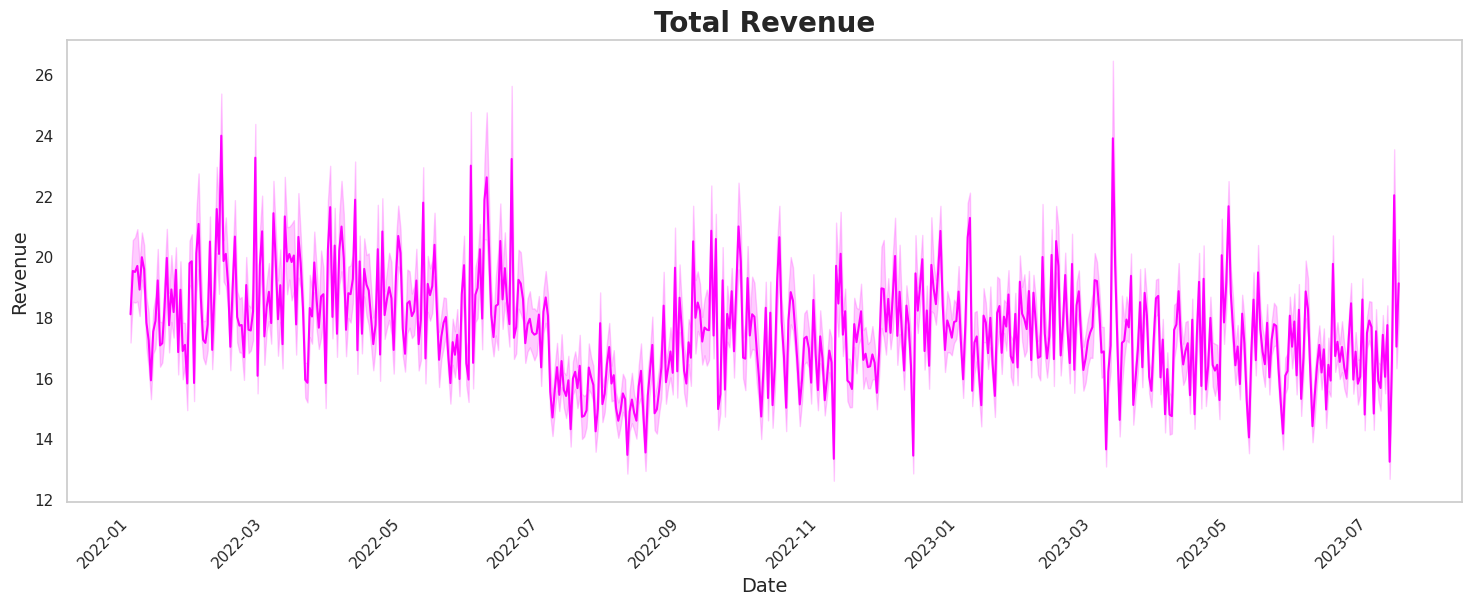

In [61]:
# Timeseries visualization of Daily Revenue over the complete period

plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Revenue', data=df, color='magenta', linewidth=1.5)

plt.title('Total Revenue', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

### Interpretation

The "Total Revenue" chart shows a consistent daily fluctuation with no clear long-term trend, but it exhibits noticeable seasonal dips in mid-2022 and mid-2023 (around July-September), suggesting periods of lower revenue.

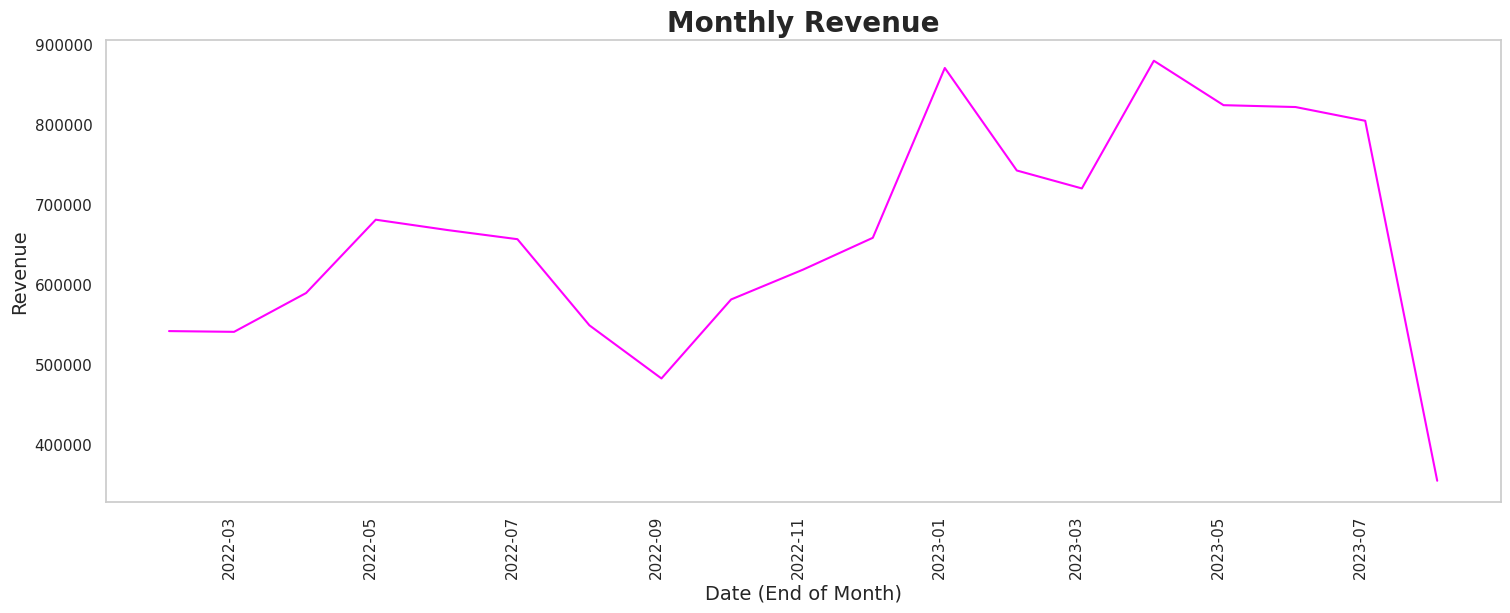

In [62]:
# --- Prepare data for Monthly Revenue ---
# Set 'Date' as index, resample by 'M' (month end) and sum 'Revenue'.
# .reset_index() converts the aggregated Series back into a DataFrame
# with 'Date' as a regular column.
monthly_revenue_summary = df.set_index('Date')['Revenue'].resample('M').sum().reset_index()


# --- Plotting Monthly Revenue ---
plt.figure(figsize=(18, 6))

sns.lineplot(
    x='Date',
    y='Revenue',
    data=monthly_revenue_summary, # Use the monthly aggregated data
    color='magenta',
    linewidth=1.5
)

plt.title('Monthly Revenue', fontsize=20, fontweight='bold')
plt.xlabel('Date (End of Month)', fontsize=14) # Changed label to reflect monthly aggregation
plt.ylabel('Revenue', fontsize=14) # Changed label to reflect total units
plt.xticks(rotation=90, ha='right')
plt.grid(False) # Added grid for time series readability
plt.show()

### Interpretation

The "Monthly Revenue" chart shows a fluctuating upward trend in revenue from early 2022 to early 2023, followed by a sharp decline in the latter half of 2023, indicating significant month-to-month variability and a recent downturn.

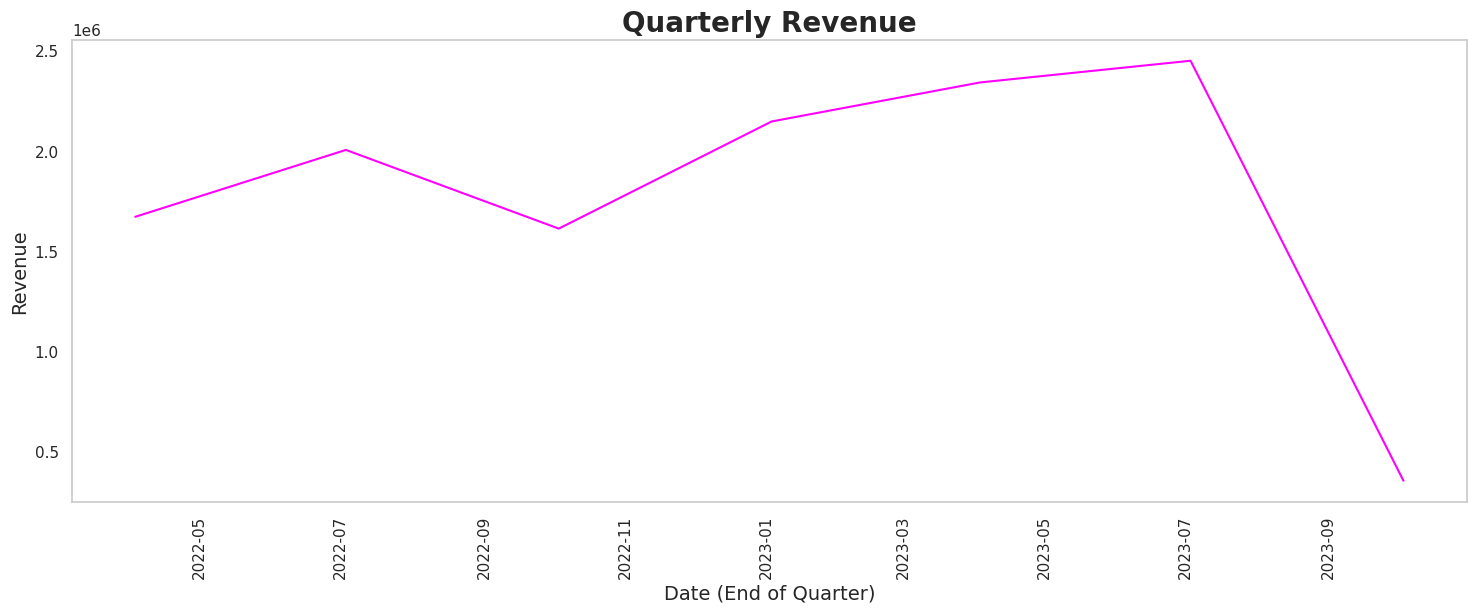

In [63]:
# --- Prepare data for Quarterly Revenue ---
# Set 'Date' as index, resample by 'Q' (Quarter end) and sum 'Revenue'.
# .reset_index() converts the aggregated Series back into a DataFrame
# with 'Date' as a regular column.
quarterly_units_summary = df.set_index('Date')['Revenue'].resample('Q').sum().reset_index()


# --- Plotting Quarterly Revenue ---
plt.figure(figsize=(18, 6))

sns.lineplot(
    x='Date',
    y='Revenue',
    data=quarterly_units_summary, # Use the quarterly aggregated data
    color='magenta',
    linewidth=1.5
)

plt.title('Quarterly Revenue', fontsize=20, fontweight='bold')
plt.xlabel('Date (End of Quarter)', fontsize=14) # Changed label to reflect quarterly aggregation
plt.ylabel('Revenue', fontsize=14) # Changed label to reflect total units
plt.xticks(rotation=90, ha='right')
plt.grid(False) # Added grid for time series readability
plt.show()

### Interpretation

The "Quarterly Revenue" chart shows an overall upward trend in revenue from mid-2022 to mid-2023, followed by a significant and sharp decline in the last observed quarter, indicating a recent negative shift in performance.

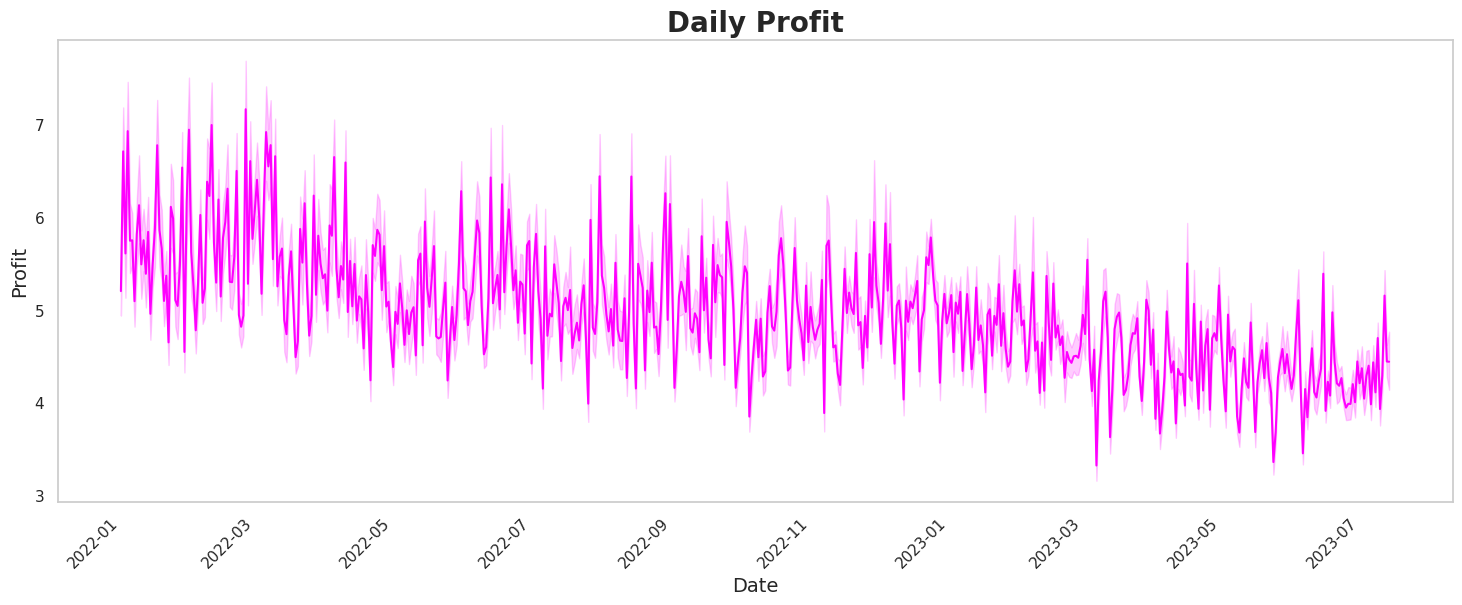

In [64]:
# Timeseries visualization of Daily Profit over the complete period

plt.figure(figsize=(18, 6))
sns.lineplot(x='Date', y='Profit', data=df, color='magenta', linewidth=1.5)

plt.title('Daily Profit', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()

### Interpretation

The "Daily Profit" chart shows a decreasing overall trend in daily profit from early 2022 to mid-2023, with consistent day-to-day fluctuations and subtle seasonal dips, indicating declining profitability over time.

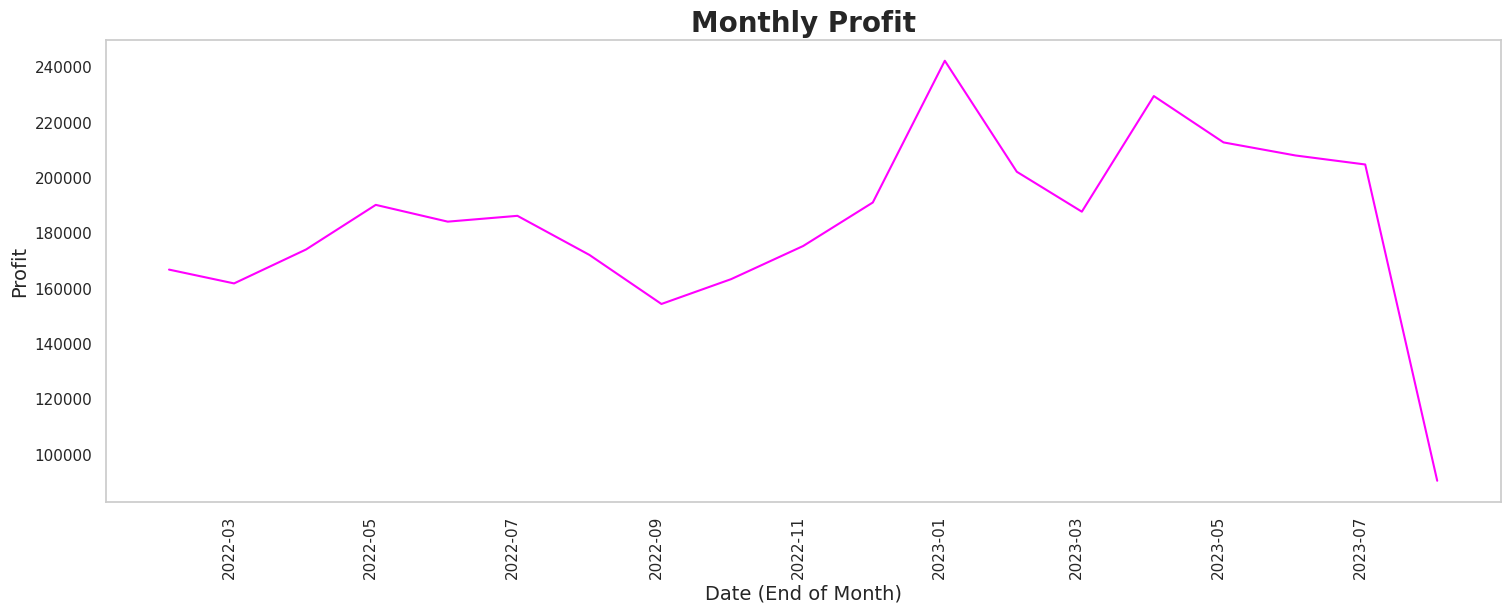

In [65]:
# --- Prepare data for Monthly Profit ---
# Set 'Date' as index, resample by 'M' (month end) and sum 'Profit'.
# .reset_index() converts the aggregated Series back into a DataFrame
# with 'Date' as a regular column.
monthly_profit_summary = df.set_index('Date')['Profit'].resample('M').sum().reset_index()


# --- Plotting Monthly Profit ---
plt.figure(figsize=(18, 6))

sns.lineplot(
    x='Date',
    y='Profit',
    data=monthly_profit_summary, # Use the monthly aggregated data
    color='magenta',
    linewidth=1.5
)

plt.title('Monthly Profit', fontsize=20, fontweight='bold')
plt.xlabel('Date (End of Month)', fontsize=14) # Changed label to reflect monthly aggregation
plt.ylabel('Profit', fontsize=14) # Changed label to reflect total units
plt.xticks(rotation=90, ha='right')
plt.grid(False) # Added grid for time series readability
plt.show()

### Interpretation

The "Monthly Profit" chart displays a fluctuating overall trend in profit from early 2022 to early 2023, followed by a sharp decline in the latter half of 2023, indicating a recent significant drop in monthly profitability.

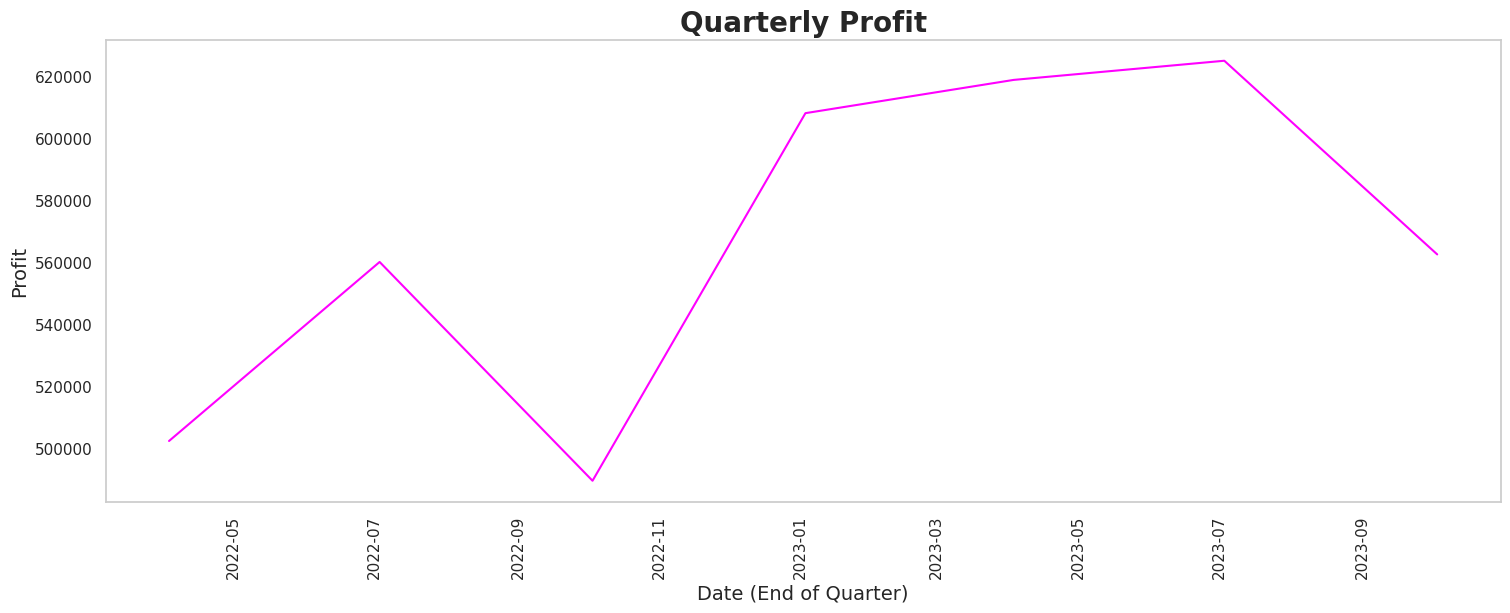

In [239]:
# --- Prepare data for Quarterly Profit ---
# Set 'Date' as index, resample by 'Q' (Quarter end) and sum 'Profit'.
# .reset_index() converts the aggregated Series back into a DataFrame
# with 'Date' as a regular column.
quarterly_units_summary = df.set_index('Date')['Profit'].resample('Q').sum().reset_index()


# --- Plotting Quarterly Profit ---
plt.figure(figsize=(18, 6))

sns.lineplot(
    x='Date',
    y='Profit',
    data=quarterly_units_summary, # Use the quarterly aggregated data
    color='magenta',
    linewidth=1.5
)

plt.title('Quarterly Profit', fontsize=20, fontweight='bold')
plt.xlabel('Date (End of Quarter)', fontsize=14) # Changed label to reflect quarterly aggregation
plt.ylabel('Profit', fontsize=14) # Changed label to reflect total units
plt.xticks(rotation=90, ha='right')
plt.grid(False) # Added grid for time series readability
plt.show()

### Interpretation

The "Quarterly Profit" chart displays an initially volatile trend in profit from mid-2022 to late 2022, followed by a consistent increase until mid-2023, and then a noticeable decline in the final observed quarter.

# 10. Bivariate analysis - Numerical Vs Numerical variable

### A. Quantitative Analysis with visualization

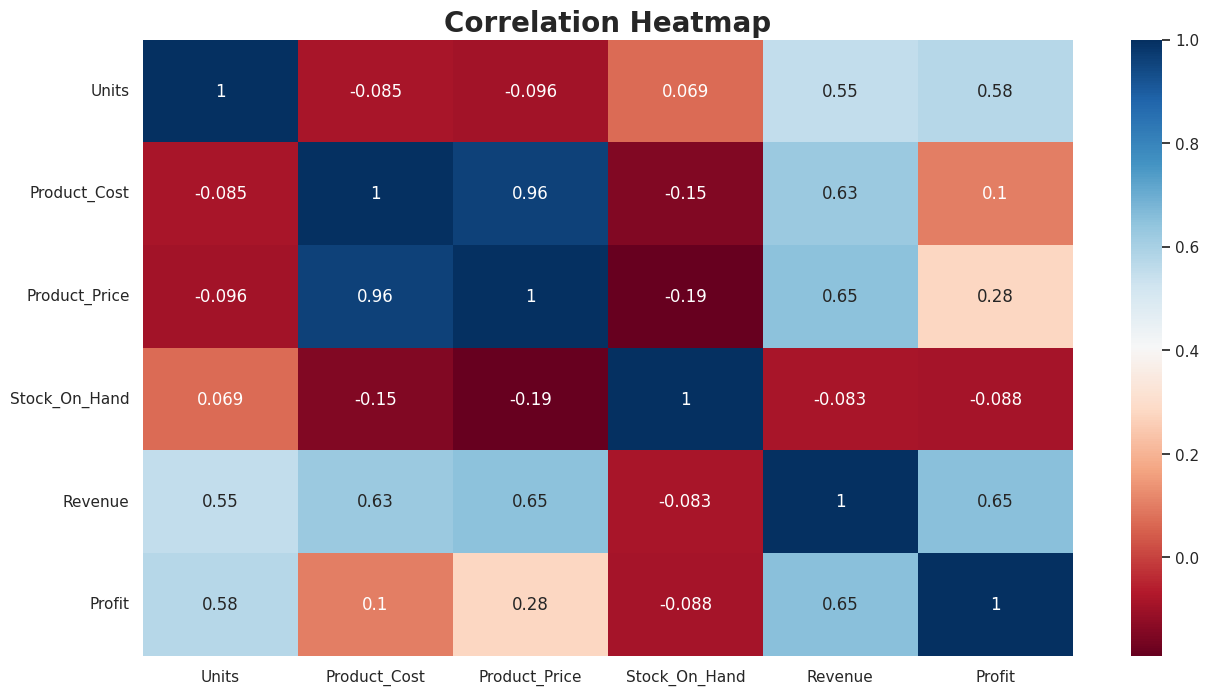

In [82]:
columns = ['Units', 'Product_Cost', 'Product_Price' , 'Stock_On_Hand', 'Revenue', 'Profit']


plt.figure(figsize=(15, 8))
sns.heatmap(df[columns].corr(method='pearson') , annot = True , cmap = 'RdBu')

plt.title('Correlation Heatmap', fontsize=20, fontweight='bold')
plt.show()


### Interpretation

* Strong Positive Price-Cost Relationship: Product_Cost and Product_Price are very highly positively correlated (0.96), indicating that higher cost products are priced higher.
* Units Correlate Positively with Revenue and Profit: Units sold shows moderate positive correlations with Revenue (0.55) and Profit (0.58), which is expected as more units sold generally lead to more revenue and profit.
* Revenue and Profit are Highly Interdependent: Revenue and Profit have a very strong positive correlation (0.65), as profit is directly derived from revenue and cost.
* Price and Cost Drive Revenue/Profit More Than Units: Product_Price and Product_Cost exhibit stronger positive correlations with Revenue (0.65 and 0.63 respectively) and Profit (0.28 for Price, 0.1 for Cost) compared to Units sold, suggesting pricing strategy and cost management significantly impact financial outcomes.
* Weak to Negative Stock_On_Hand Relationships: Stock_On_Hand has weak negative correlations with Revenue (-0.083) and Profit (-0.088), and a weak negative correlation with Product_Price (-0.19), implying that higher stock doesn't directly translate to higher sales or profit, and potentially lower-priced items might have higher stock.
* Minimal Direct Unit-Price/Cost Relationship: Units sold has weak negative correlations with Product_Cost (-0.085) and Product_Price (-0.096), suggesting that the number of units sold per transaction is not strongly influenced by the individual product's cost or price within this dataset.

### B. Visualization

* Scatterplot to visualize Units vs. Product_Price
* Scatterplot to visualize Product_Cost vs. Product_Price
* Scatterplot to visualize Stock_On_Hand vs. Units

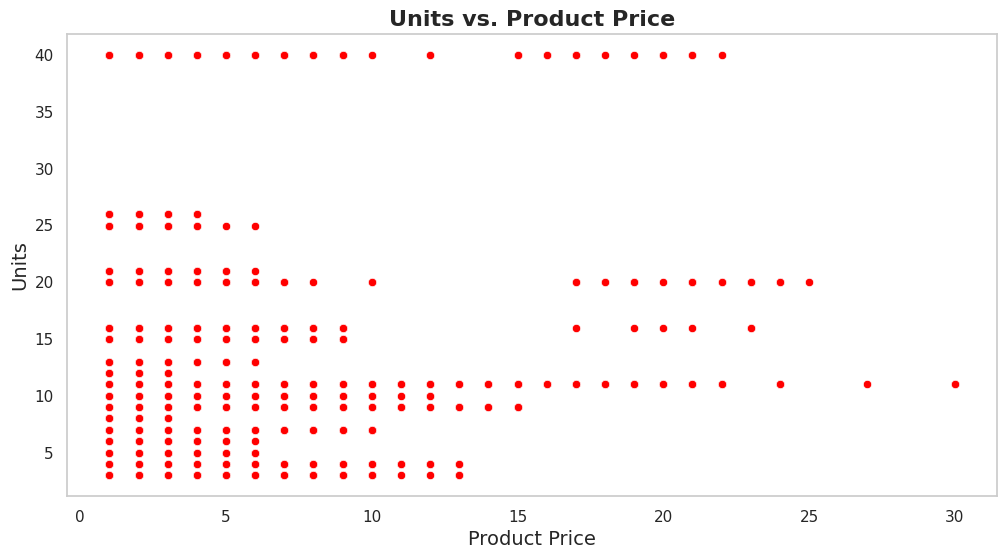

In [92]:
# Visualize a scatterplot for Unit Vs Price

plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='Units', y='Product_Price',  color='red')

plt.title('Units vs. Product Price', fontsize=16, fontweight='bold')
plt.xlabel('Product Price', fontsize=14)
plt.ylabel('Units', fontsize=14)
plt.grid(False)
plt.show()

### Interpretation

The "Units vs. Product Price" scatter plot shows no strong linear correlation or discernible inverse relationship between the Units sold and the Product Price; instead, it reveals that transactions with very low unit counts are prevalent across all price ranges, while higher unit sales (e.g., 40 units) occur at diverse price points, indicating that product price alone is not a primary driver of the number of units sold per transaction.

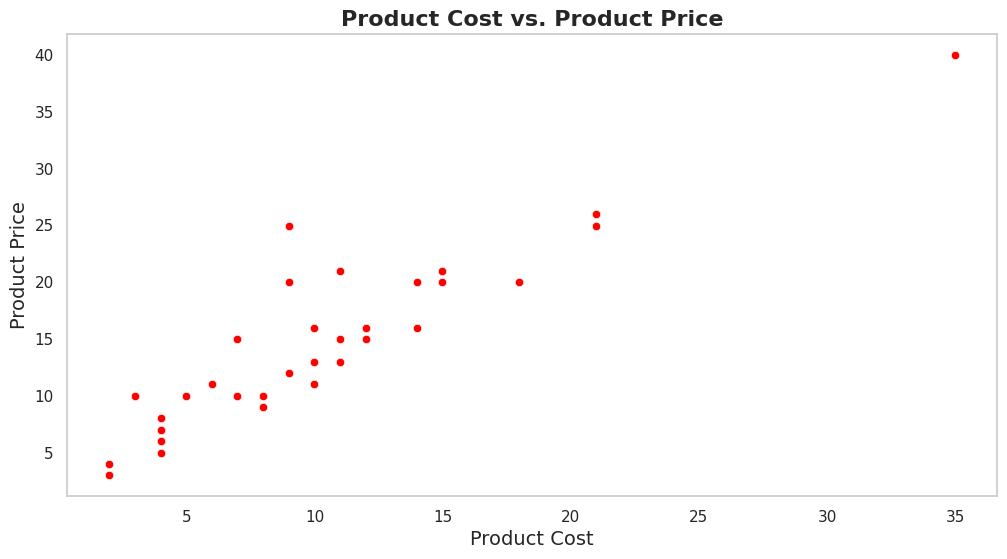

In [93]:
# Visualize a scatterplot for Cost Vs Price

plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='Product_Cost', y='Product_Price',  color='red')

plt.title('Product Cost vs. Product Price', fontsize=16, fontweight='bold')
plt.xlabel('Product Cost', fontsize=14)
plt.ylabel('Product Price', fontsize=14)
plt.grid(False)
plt.show()

### Interpretation

The "Product Cost vs. Product Price" scatter plot displays a strong, positive linear relationship, indicating that as the Product Cost increases, the Product Price generally increases proportionally, with minimal deviation from this trend.

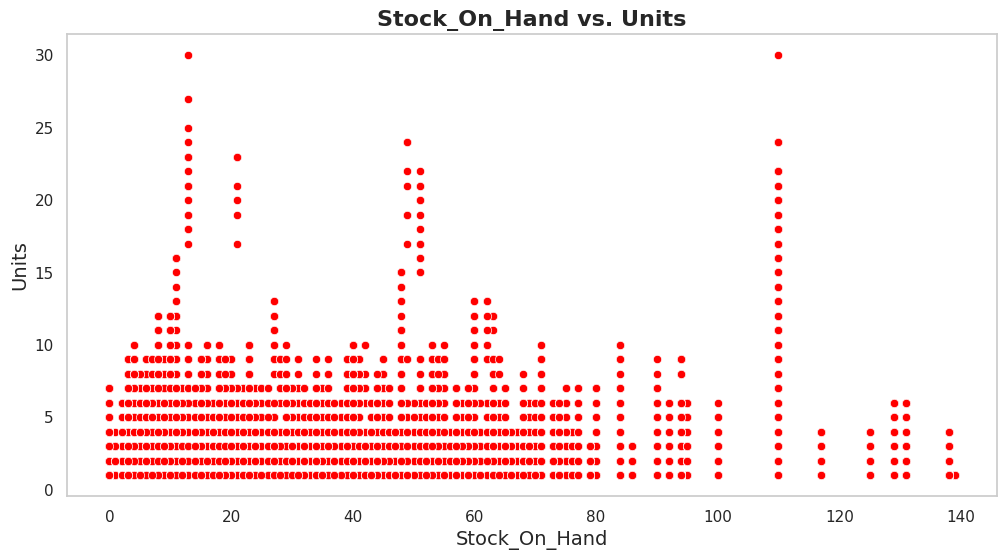

In [94]:
# Visualize a scatterplot for Stock on Hand Vs Units
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='Stock_On_Hand', y='Units',  color='red')

plt.title('Stock_On_Hand vs. Units', fontsize=16, fontweight='bold')
plt.xlabel('Stock_On_Hand', fontsize=14)
plt.ylabel('Units', fontsize=14)
plt.grid(False)
plt.show()

### Interpretation

The "Stock_On_Hand vs. Units" scatter plot shows no clear linear relationship or consistent pattern between the current Stock_On_Hand and the number of Units sold; instead, it indicates that various unit quantities are sold across a wide range of stock levels, and the highest unit sales are observed when Stock_On_Hand is low (e.g., below 20) or around 110.

# 11. Bivariate analysis - Numerical Vs Categorical variable

### A. Quantitative Analysis

* What is the average Units sold per Product_Category?
*  Which category sells the most units?
* Which Store_City generates the highest average Revenue or Profit per transaction?
* How does Product_Price vary across different Product_Categorys?

In [97]:
print("--- Data Analysis Insights ---")

# 1. What is the average Units sold per Product_Category?
print("\n1. Average Units Sold per Product Category:")
average_units_per_category = df.groupby('Product_Category')['Units'].mean()
print(average_units_per_category)

# 2. Which category sells the most units?
print("\n2. Product Category with the Most Units Sold:")
category_most_units = df.groupby('Product_Category')['Units'].sum().idxmax()
total_units_most_category = df.groupby('Product_Category')['Units'].sum().max()
print(f"  The category that sells the most units is: '{category_most_units}' with a total of {total_units_most_category} units.")

# 3. Which Store_City generates the highest average Revenue or Profit per transaction?
print("\n3. Store City with Highest Average Revenue/Profit per Transaction:")
avg_revenue_per_city = df.groupby('Store_City')['Revenue'].mean()
city_highest_avg_revenue = avg_revenue_per_city.idxmax()
max_avg_revenue = avg_revenue_per_city.max()
print(f"  Highest Average Revenue per transaction: '{city_highest_avg_revenue}' (${max_avg_revenue:.2f})")

avg_profit_per_city = df.groupby('Store_City')['Profit'].mean()
city_highest_avg_profit = avg_profit_per_city.idxmax()
max_avg_profit = avg_profit_per_city.max()
print(f"  Highest Average Profit per transaction: '{city_highest_avg_profit}' (${max_avg_profit:.2f})")

--- Data Analysis Insights ---

1. Average Units Sold per Product Category:
Product_Category
Art & Crafts         1.489470
Electronics          1.372074
Games                1.254895
Sports & Outdoors    1.294739
Toys                 1.209541
Name: Units, dtype: float64

2. Product Category with the Most Units Sold:
  The category that sells the most units is: 'Art & Crafts' with a total of 273982.0 units.

3. Store City with Highest Average Revenue/Profit per Transaction:
  Highest Average Revenue per transaction: 'Ciudad Victoria' ($18.80)
  Highest Average Profit per transaction: 'Morelia' ($6.28)


### B. Visualization

* Visualizing the Average Units Sold per Store_Name
* Visualizing the Average Revenue per Store_Name
* Visualizing Average Units Sold per Product_Category
* Visualizing Average Revenue per Product_Category

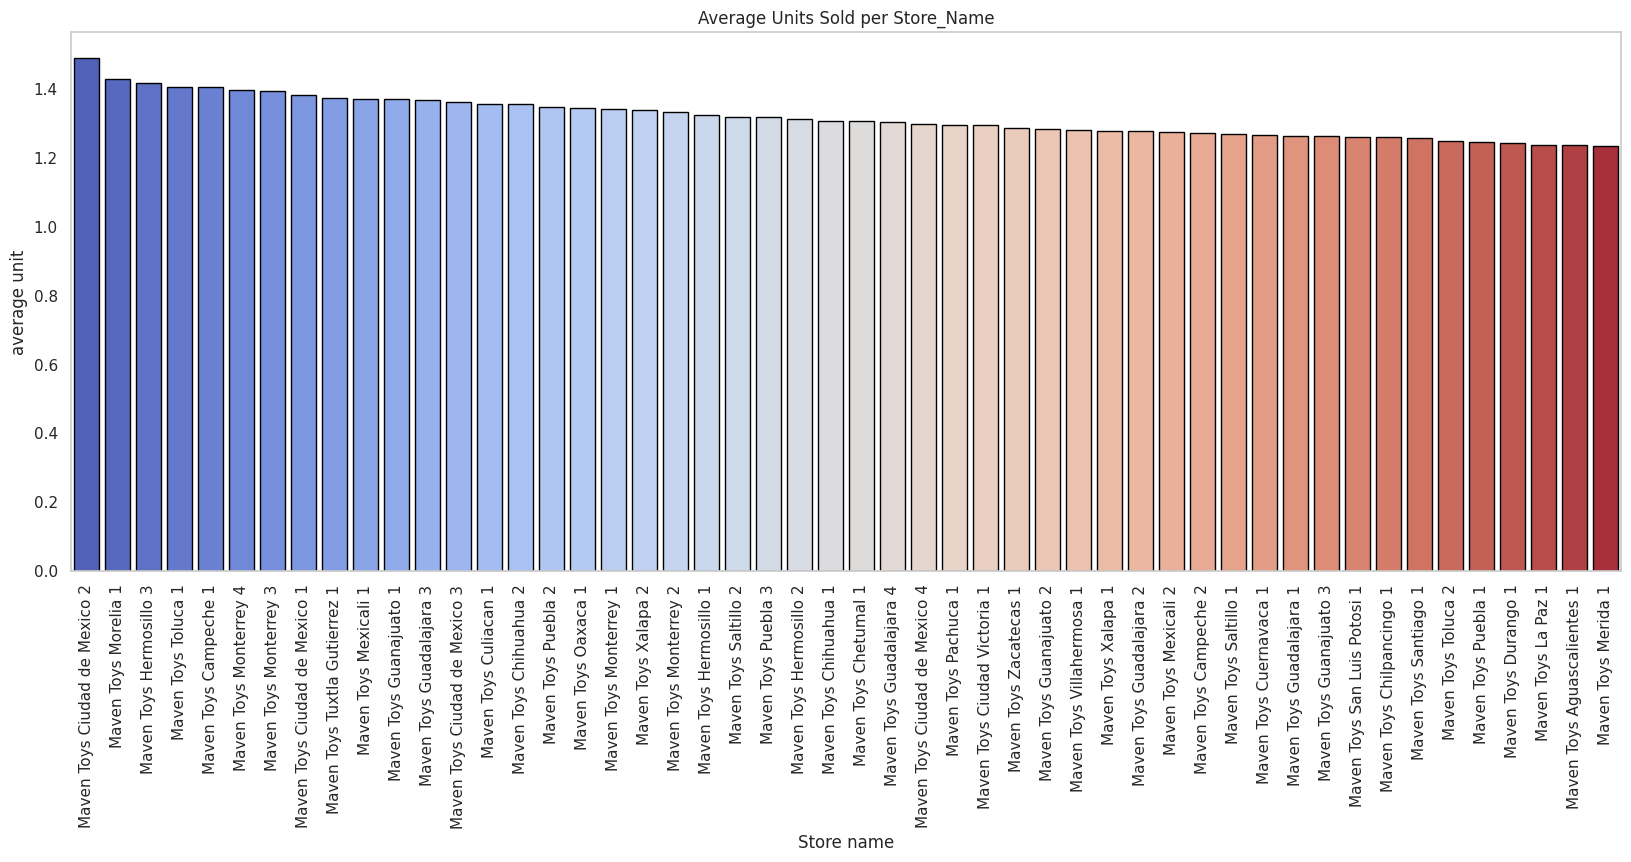

In [146]:
# Visualizing the Average Units Sold per Store_Name

plt.figure(figsize = (20,7))
sns.barplot(df.groupby('Store_Name')['Units'].mean().sort_values(ascending=False) , palette = 'coolwarm' , edgecolor = 'black')

plt.title('Average Units Sold per Store_Name')
plt.xlabel('Store name')
plt.ylabel('average unit')
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

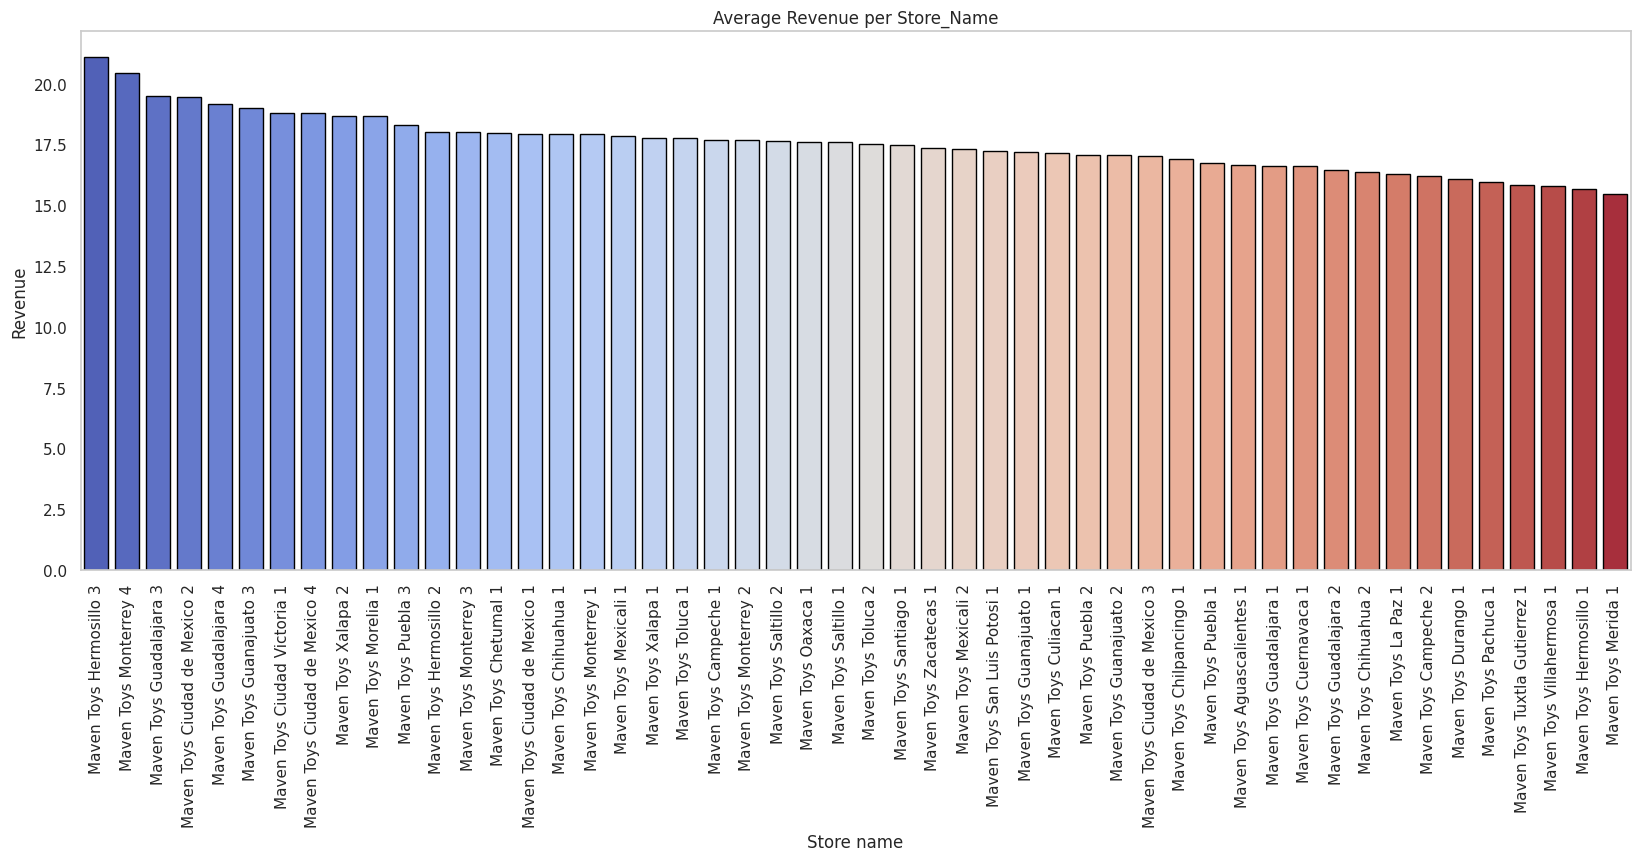

In [147]:
# Visualizing the Average Revenue per Store_Name

plt.figure(figsize = (20,7))
sns.barplot(df.groupby('Store_Name')['Revenue'].mean().sort_values(ascending=False) , palette = 'coolwarm' , edgecolor = 'black')

plt.title('Average Revenue per Store_Name')
plt.xlabel('Store name')
plt.ylabel('Revenue')
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

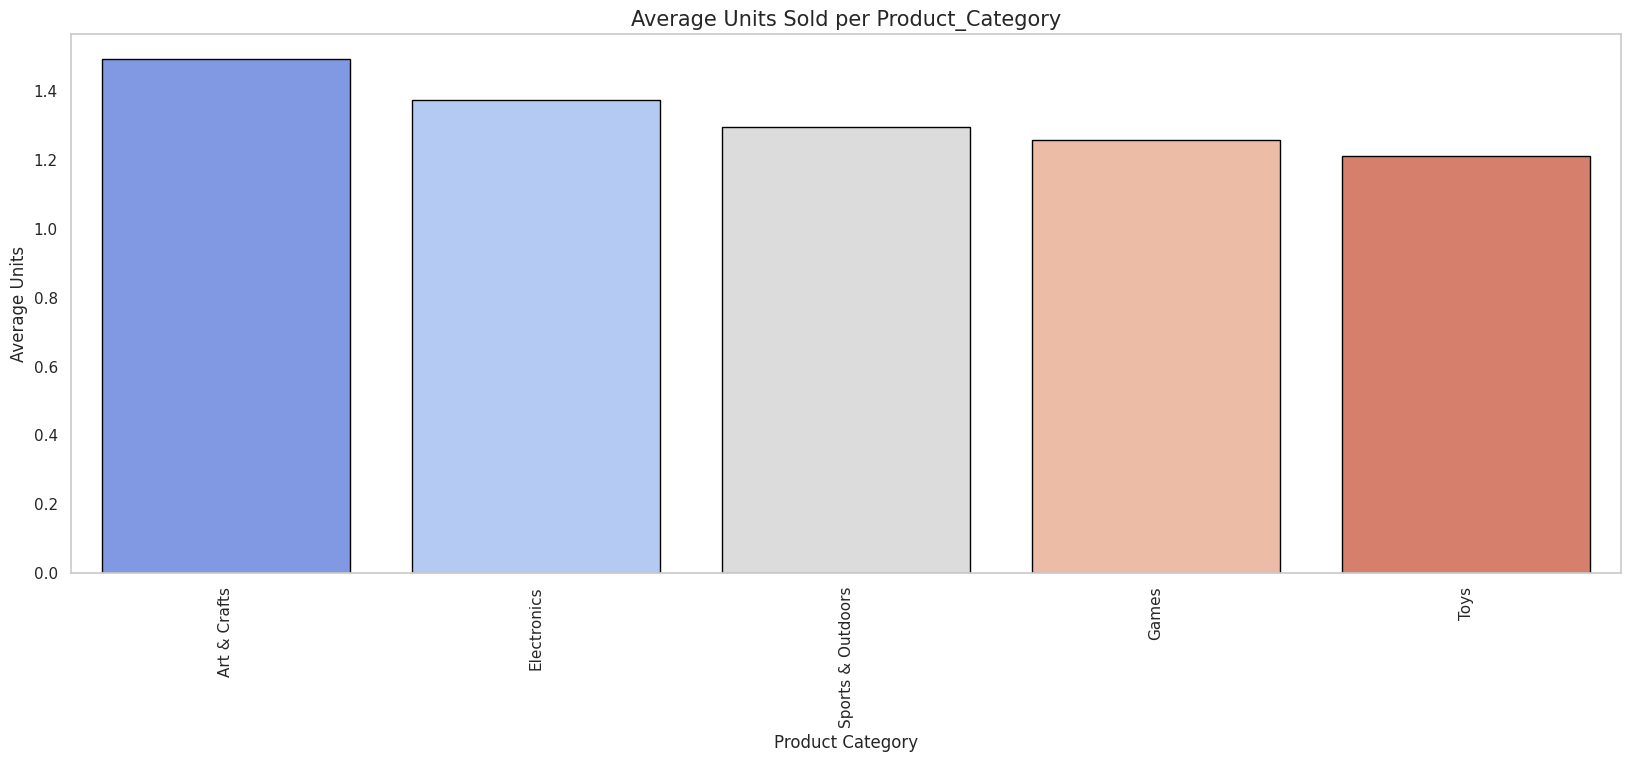

In [152]:
# Visualizing Average Units Sold per Product_Category

plt.figure(figsize = (20,7))
sns.barplot(df.groupby('Product_Category')['Units'].mean().sort_values(ascending=False) , palette = 'coolwarm' , edgecolor = 'black')

plt.title('Average Units Sold per Product_Category', fontsize = 15)
plt.xlabel('Product Category')
plt.ylabel('Average Units')
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

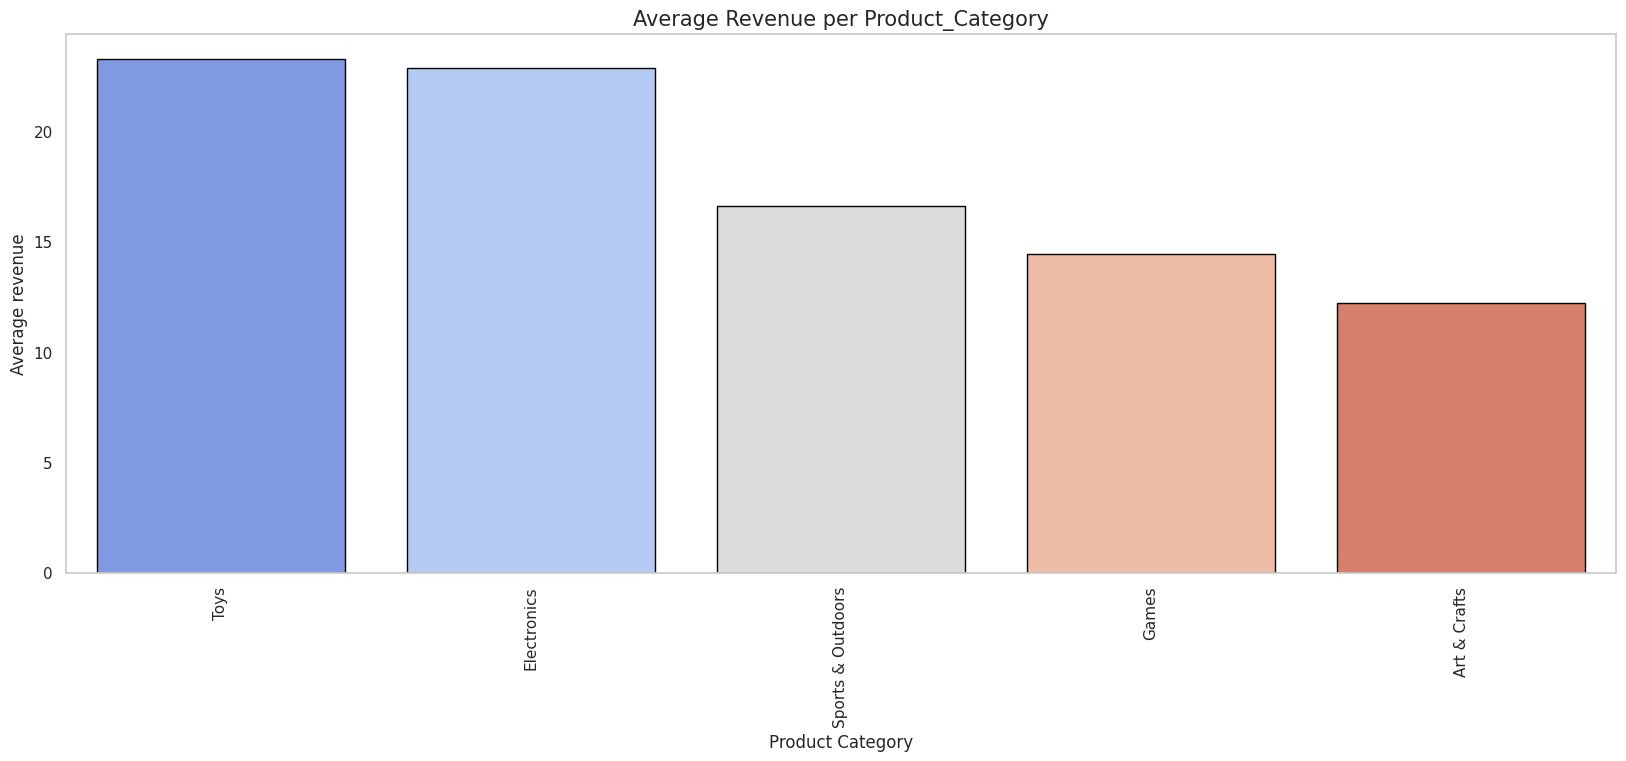

In [153]:
# Visualizing Average Revenue per Product_Category

plt.figure(figsize = (20,7))
sns.barplot(df.groupby('Product_Category')['Revenue'].mean().sort_values(ascending=False) , palette = 'coolwarm' , edgecolor = 'black')

plt.title('Average Revenue per Product_Category', fontsize = 15)
plt.xlabel('Product Category')
plt.ylabel('Average revenue')
plt.xticks(rotation = 90)
plt.grid(False)
plt.show()

# 12. Bivariate analysis - Categorical Vs Categorical variable

* Calculate the proportion of each Product_Category within each Store_Name
* Calculate the proportion of each Product_Category within Top 10 Store_Name
* Create a contingency table (cross-tabulation) for counts
* Create a contingency table (cross-tabulation) for percentage

### A. Calculate the proportion of each Product_Category within each Store_Name

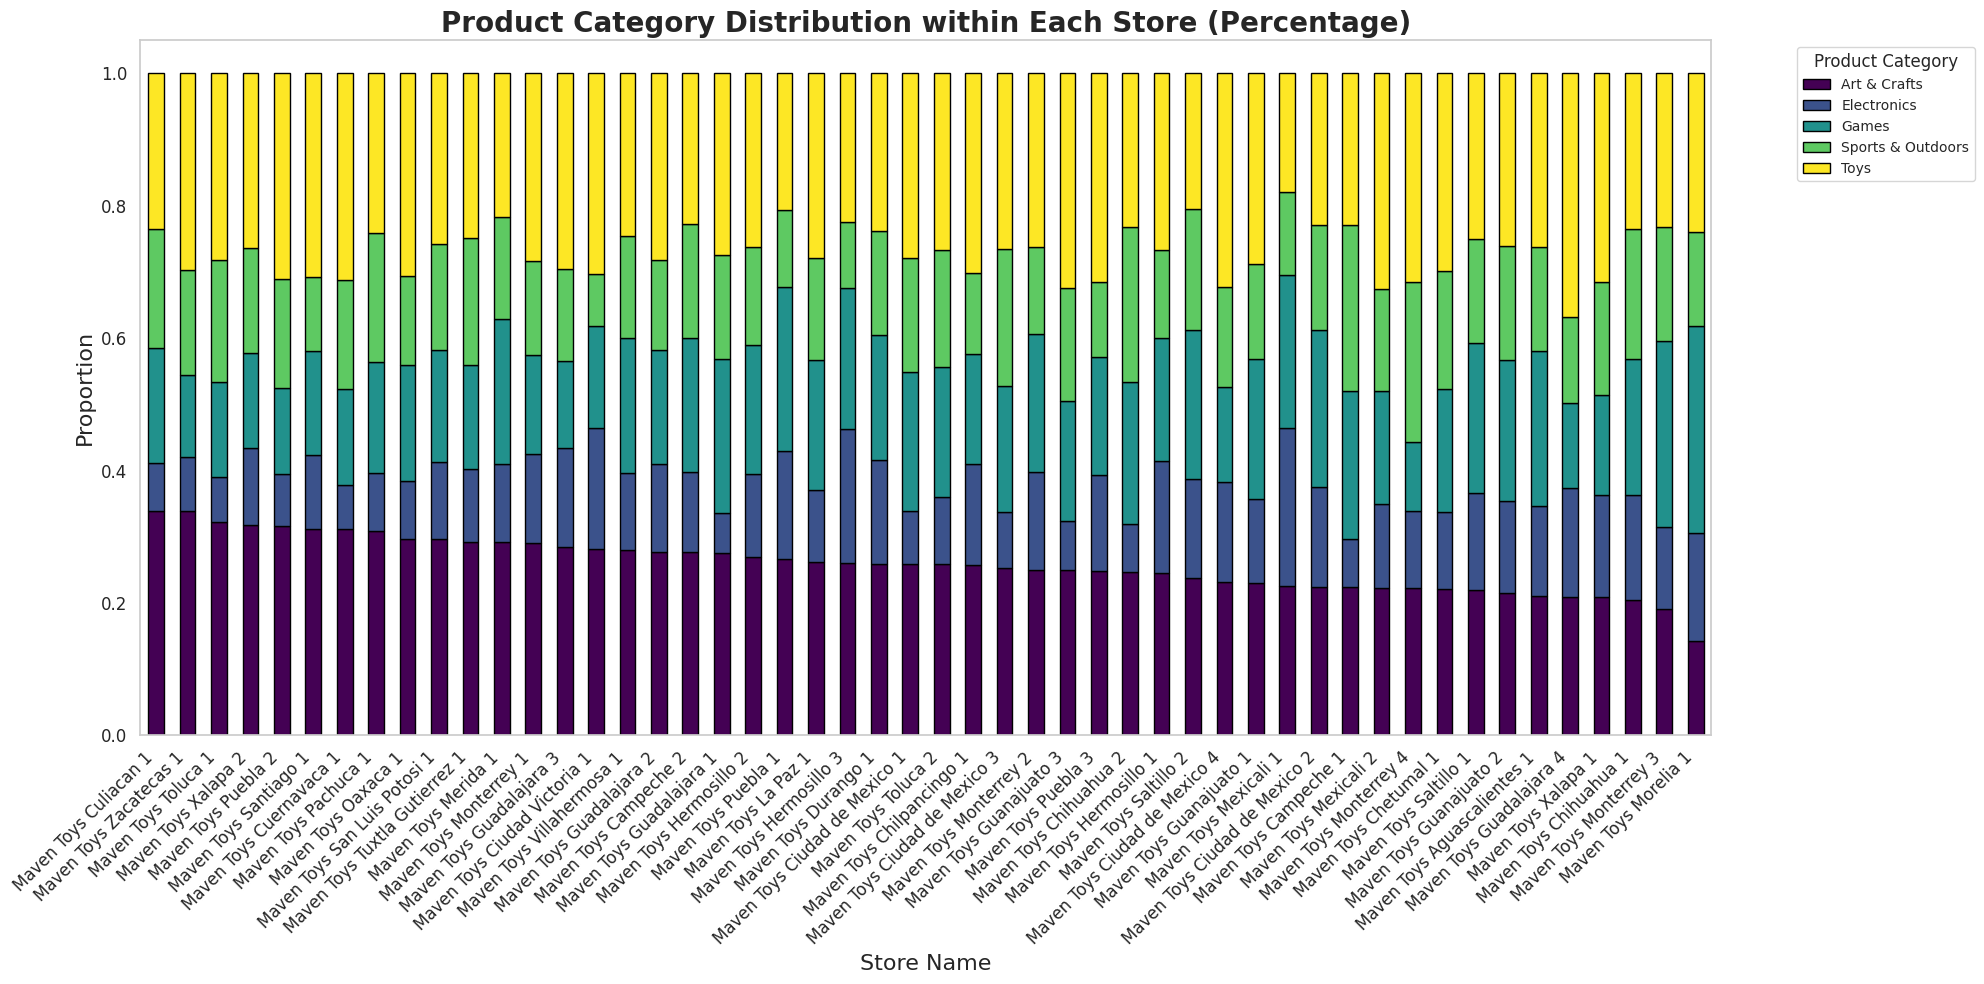

In [100]:
# --- Calculate the proportion of each Product_Category within each Store_Name ---

# 1. Create a cross-tabulation (contingency table) of counts
cross_tab = pd.crosstab(df['Store_Name'], df['Product_Category'])

# 2. Convert counts to proportions (percentages) along the rows (axis=1)
# This calculates, for each store, what percentage each product category makes up of its total.
percentage_cross_tab = cross_tab.apply(lambda r: r / r.sum(), axis=1)

# Sort stores by total count or alphabetically for consistent visualization (optional)
# For example, sorting by total sales volume (sum of units per store) might be more insightful if units column was used
# For now, let's sort by the sum of percentages for clarity or alphabetical
percentage_cross_tab = percentage_cross_tab.sort_values(by=percentage_cross_tab.columns[0], ascending=False) # Or by any other column if meaningful

# --- Plotting the Stacked Bar Chart ---
plt.figure(figsize=(20, 10)) # Adjust figure size as needed

# Use the .plot() method directly on the DataFrame for convenience with stacked bars
ax = percentage_cross_tab.plot(
    kind='bar',
    stacked=True,
    colormap='viridis', # Choose a suitable colormap
    ax=plt.gca(),       # Get current axes
    edgecolor='black'
)

plt.title('Product Category Distribution within Each Store (Percentage)', fontsize=20, fontweight='bold')
plt.xlabel('Store Name', fontsize=16)
plt.ylabel('Proportion', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate store names for readability
plt.yticks(fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10) # Place legend outside
plt.grid(False) # Only y-grid makes sense for stacked bars

plt.tight_layout() # Adjust layout to prevent labels/titles from being cut off
plt.show()

### B. Calculate the proportion of each Product_Category within top N Store_Name

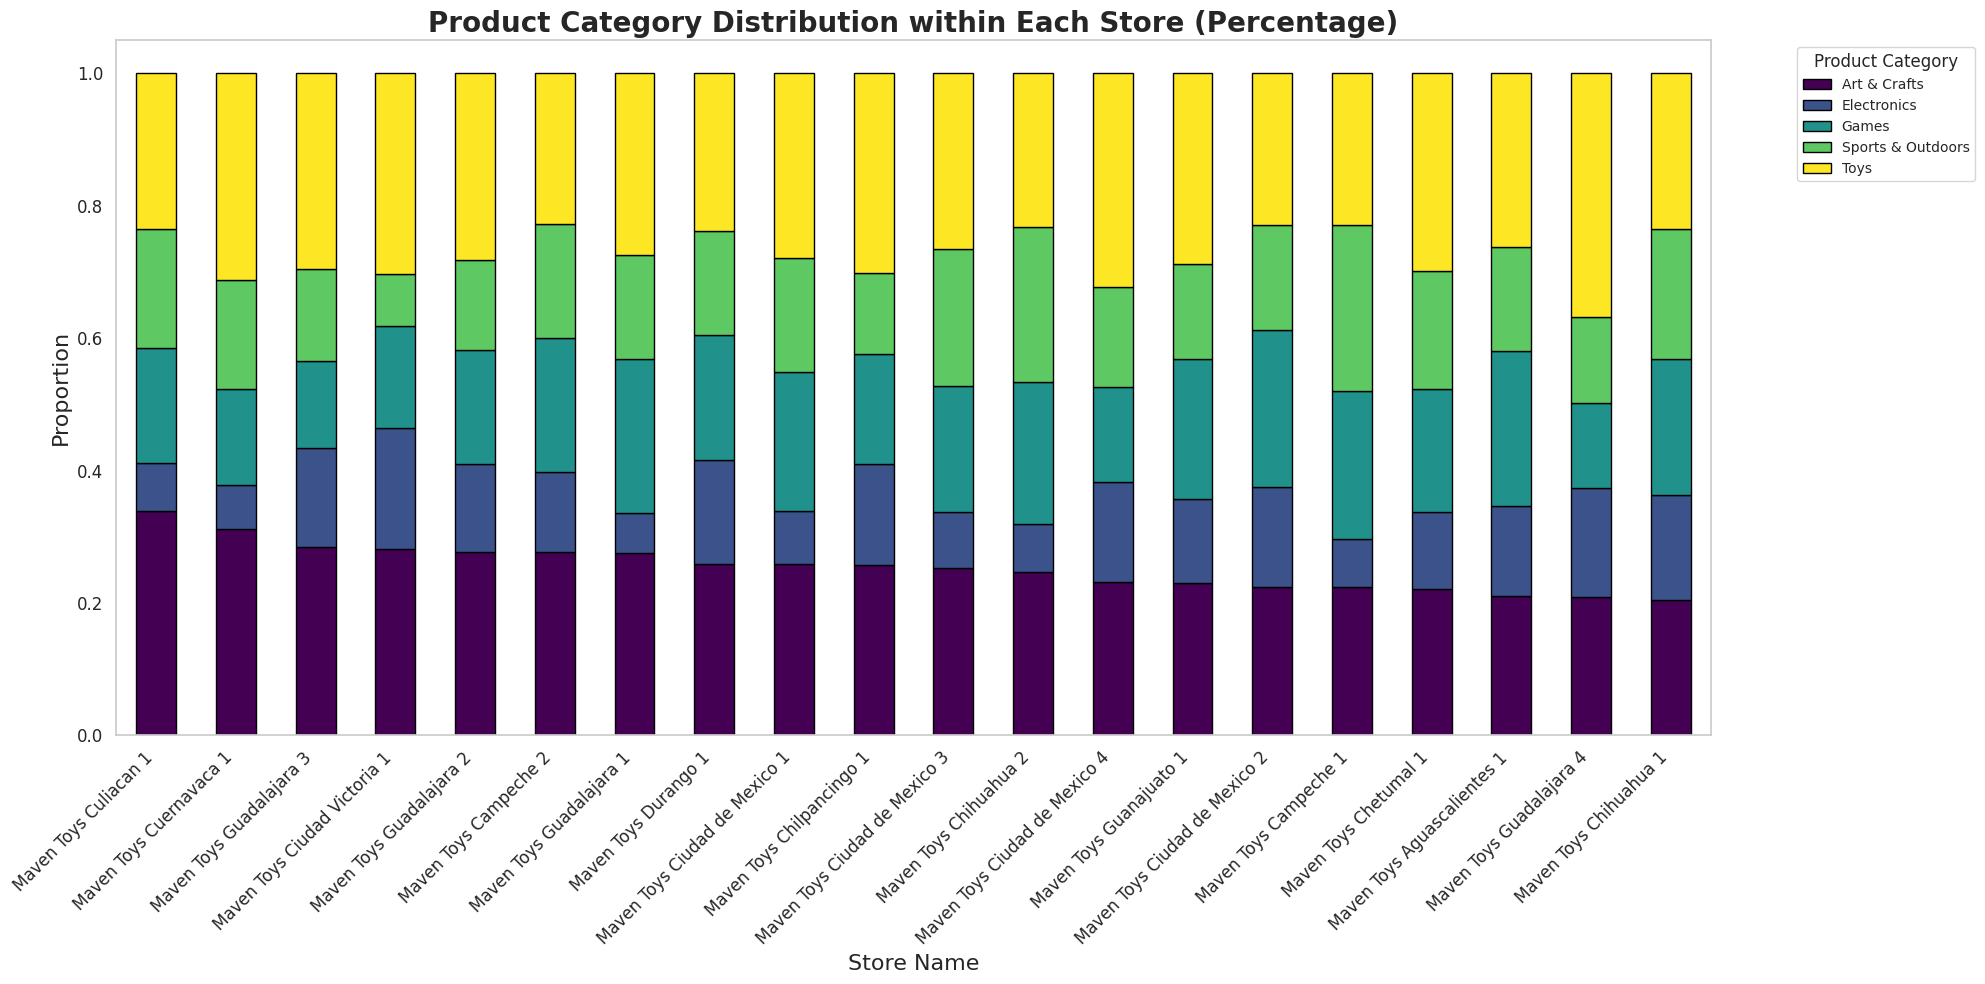

In [105]:
# --- Calculate the proportion of each Product_Category within top N Store_Name ---

# 1. Create a cross-tabulation (contingency table) of counts
cross_tab = pd.crosstab(df['Store_Name'], df['Product_Category']).head(20)

# 2. Convert counts to proportions (percentages) along the rows (axis=1)
# This calculates, for each store, what percentage each product category makes up of its total.
percentage_cross_tab = cross_tab.apply(lambda r: r / r.sum(), axis=1)

# Sort stores by total count or alphabetically for consistent visualization (optional)
# For example, sorting by total sales volume (sum of units per store) might be more insightful if units column was used
# For now, let's sort by the sum of percentages for clarity or alphabetical
percentage_cross_tab = percentage_cross_tab.sort_values(by=percentage_cross_tab.columns[0], ascending=False) # Or by any other column if meaningful

# --- Plotting the Stacked Bar Chart ---
plt.figure(figsize=(20, 10)) # Adjust figure size as needed

# Use the .plot() method directly on the DataFrame for convenience with stacked bars
ax = percentage_cross_tab.plot(
    kind='bar',
    stacked=True,
    colormap='viridis', # Choose a suitable colormap
    ax=plt.gca(),       # Get current axes
    edgecolor='black'
)

plt.title('Product Category Distribution within Each Store (Percentage)', fontsize=20, fontweight='bold')
plt.xlabel('Store Name', fontsize=16)
plt.ylabel('Proportion', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12) # Rotate store names for readability
plt.yticks(fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10) # Place legend outside
plt.grid(False) # Only y-grid makes sense for stacked bars

plt.tight_layout() # Adjust layout to prevent labels/titles from being cut off
plt.show()

### C. Create a contingency table (cross-tabulation) for counts

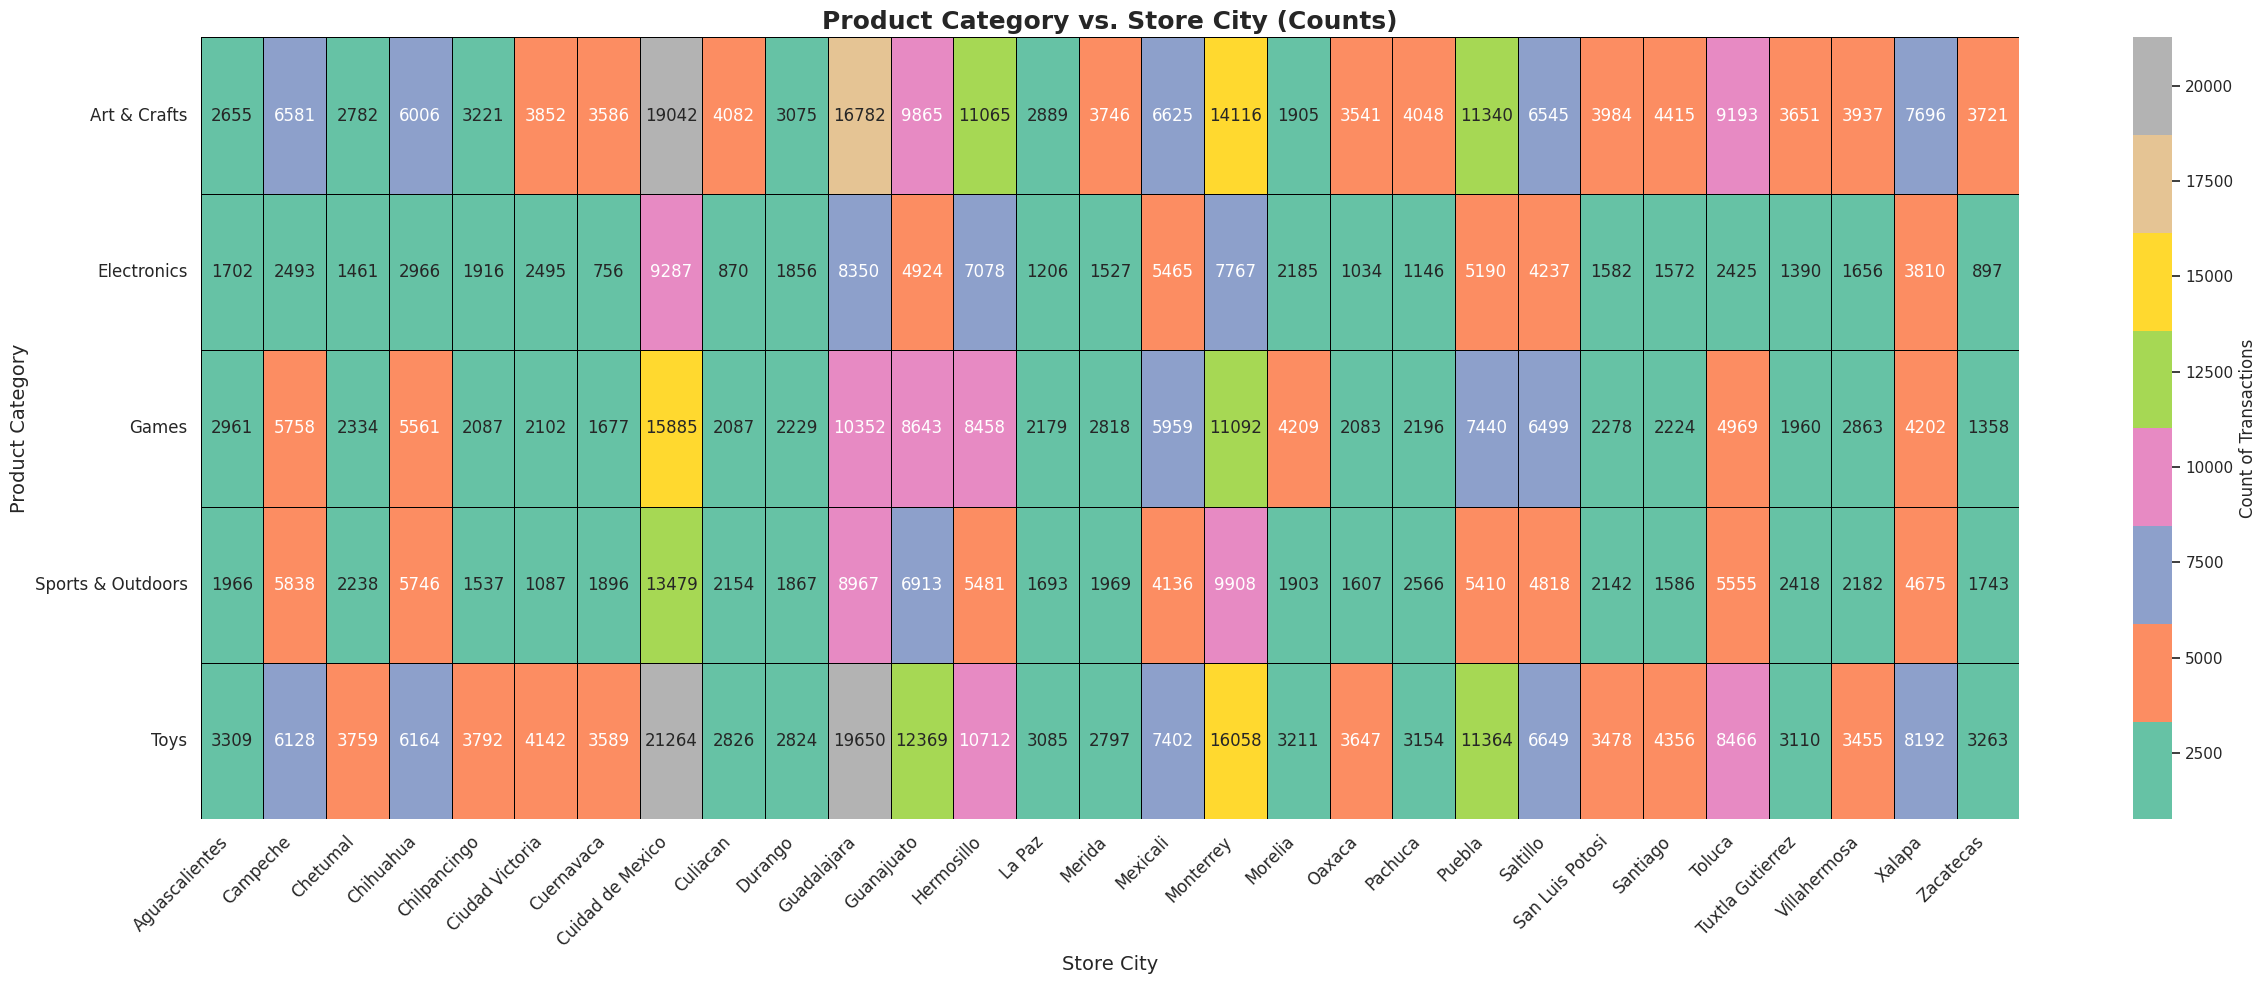

In [119]:
# Create a contingency table (cross-tabulation) for counts

contingency_table_counts = pd.crosstab(df['Product_Category'], df['Store_City'])

plt.figure(figsize=(25, 10)) # Adjust figure size for better readability

sns.heatmap(
    contingency_table_counts,
    annot=True,     # Show the numerical values on the heatmap
    fmt='d',        # Format annotations as integers
    cmap='Set2',   # Colormap (e.g., 'Blues', 'viridis', 'YlGnBu')
    linewidths=.5,  # Add lines between cells
    linecolor='black', # Color of the lines
    cbar_kws={'label': 'Count of Transactions'} # Label for the color bar
)

plt.title('Product Category vs. Store City (Counts)', fontsize=18, fontweight='bold')
plt.xlabel('Store City', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12) # Keep y-labels horizontal
plt.tight_layout()
plt.show()

### D. Create a contingency table (cross-tabulation) for percentage

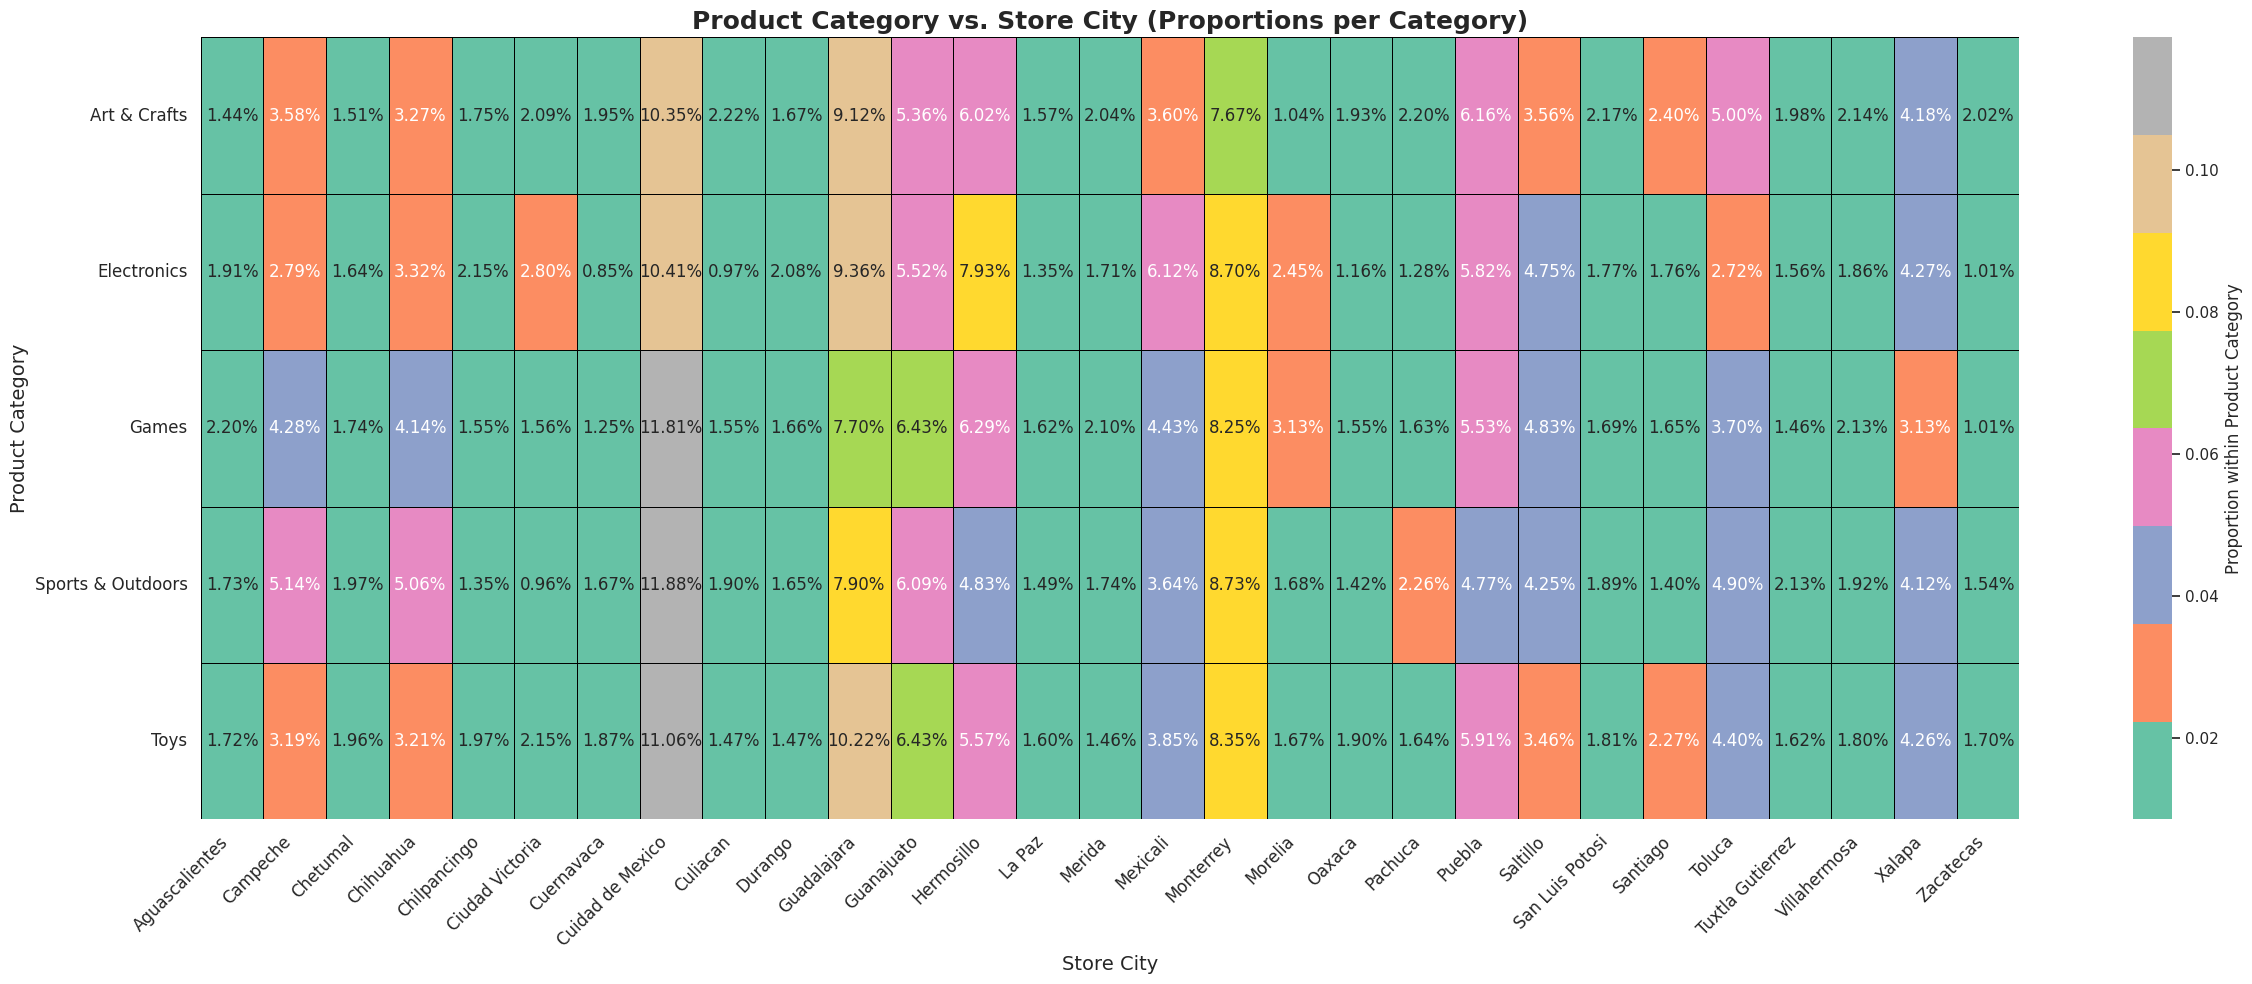

In [120]:
# Create a contingency table for proportions
# Normalize by 'index' to get proportions of Product_Category within each Store_City total
# Or normalize='columns' to get proportions of Store_City within each Product_Category total
# Or normalize='all' to get proportion of total transactions

contingency_table_proportions = pd.crosstab(df['Product_Category'], df['Store_City'], normalize='index') # or 'columns', 'all'

plt.figure(figsize=(25, 10)) # Adjust figure size

sns.heatmap(
    contingency_table_proportions,
    annot=True,         # Show the numerical values on the heatmap
    fmt='.2%',          # Format annotations as percentages with two decimal places
    cmap='Set2',      # Different colormap for distinction
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Proportion within Product Category'} # Label for the color bar
)

plt.title('Product Category vs. Store City (Proportions per Category)', fontsize=18, fontweight='bold')
plt.xlabel('Store City', fontsize=14)
plt.ylabel('Product Category', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

# COMPLETED